In [2]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 기본 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [4]:
# 지도시각화 모듈
import folium
import json

In [5]:
#데이터 불러오기

train = pd.read_csv('C:\\Users\\User\\Desktop\\빅데이터\\city\\train_hakgun_area_num.csv', index_col = [0], encoding = 'euc-kr')

## 구별 집 값 증가율

In [112]:
# 동을 기준으로 집값 평균 구하기

gu_price = train.groupby(['gu','transaction_year'])['transaction_real_price'].mean()

In [8]:
gu_name =['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구',
          '서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']

In [114]:
gu_price = pd.DataFrame(gu_price)
gu_price.loc['강남구',:]

,transaction_real_price
transaction_year,
2008,75457.958253
2009,90188.709167
2010,86806.669739
2011,84594.812192
2012,82886.498308
2013,83913.159167
2014,88741.570215
2015,94179.803041
2016,107857.837397


In [32]:
a = (gu_price.loc[('강남구',2012)]/gu_price.loc[('강남구',2008)])**(1/3)-1

In [115]:
first = []

for i in gu_name:
    num = (gu_price.loc[(i,2012)]/gu_price.loc[(i,2008)])**(1/3)-1
    first.append([i,*num.values.round(5)])

In [32]:
second = []

for i in gu_name:
    num = (gu_price.loc[(i,2017)]/gu_price.loc[(i,2012)])**(1/3)-1
    second.append([i,*num.values.round(5)])

In [33]:
increase1 = pd.DataFrame(first)
increase2 = pd.DataFrame(second)

In [34]:
increase = pd.merge(increase1, increase2, on =0)
increase.columns = ['gu','2008-2012','2012-2017']

In [35]:
increase

,gu,2008-2012,2012-2017
0,강남구,0.03179,0.14957
1,강동구,0.03007,0.10447
2,강북구,-0.01930,0.08629
3,강서구,0.02221,0.14432
4,관악구,-0.02007,0.08138
5,광진구,0.02940,0.07455
6,구로구,0.00318,0.09604
7,금천구,-0.02002,0.09878
8,노원구,-0.05569,0.10540
9,도봉구,-0.04385,0.08664


## 지도시각화
    평수를 분류한 후 그 평수에 따른 갯수나 가격을 지도에 그래프화 한다.
    구별 집값의 평균을 시각화하고, 전체 주택 거래의 갯수를 시각화한다.
    요즘 가장 중요한 소형 주택의 갯수와 가격을 지도화하여 관계를 찾아본다.

In [22]:
RV_price = pd.read_csv("C:\\Users\\acorn\\python\\city\\RV_price.csv", index_col = [0],encoding = 'euc-kr')

In [18]:
gu_mean = train.pivot_table('transaction_real_price','gu')
gu_mean.reset_index(inplace = True)
gu_mean

,gu,transaction_real_price
0,강남구,94977.827917
1,강동구,46180.322386
2,강북구,32846.523888
3,강서구,36881.131409
4,관악구,36150.169043
5,광진구,56677.571810
6,구로구,33601.229032
7,금천구,28286.295773
8,노원구,29212.908481
9,도봉구,28289.357754


In [19]:
# 구별 평균값 시각화
geo_path = "C:\\Users\\acorn\\python\\city\\skorea_municipalities_geo_simple_seoul.json"

geo_str = json.load(open(geo_path, encoding = 'utf-8'))


map = folium.Map(location = [37.5502,127], zoom_start = 12)
map

map.choropleth(geo_data=geo_str, data=gu_mean,
               columns = ['gu', 'transaction_real_price'],
            key_on='feature.id', fill_color = 'PuRd')

map

C:\Users\acorn\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [20]:
# 집 갯수
geo_path = 'C:\\Users\\acorn\\python\\city\\skorea_municipalities_geo_simple_seoul.json'

geo_str = json.load(open(geo_path, encoding = 'utf-8'))


map = folium.Map(location = [37.5502,127], zoom_start = 12)
map

map.choropleth(geo_data=geo_str, data=gu_area_count,
               columns = ['gu', 0],
            key_on='feature.id', fill_color = 'PuRd')

map

## 전체적인 가격 비교

In [ ]:
train["gu_mean1"] = train.groupby(['exclusive_use_area_group', 'transaction_year'])['transaction_real_price'].transform("mean")
train.head()

In [61]:
gu_area_mean = train.groupby(['gu','exclusive_use_area_group'])['transaction_real_price','gu_mean1'].mean()
gu_area_mean = pd.DataFrame(gu_area_mean)

In [62]:
train_gn=gu_area_mean.loc[["강남구"]]
train_gd=gu_area_mean.loc[["강동구"]]
train_gb=gu_area_mean.loc[["강북구"]]
train_gs=gu_area_mean.loc[["강서구"]]
train_ga=gu_area_mean.loc[["관악구"]]

train_gj=gu_area_mean.loc[["광진구"]]
train_gr=gu_area_mean.loc[["구로구"]]
train_gc=gu_area_mean.loc[["금천구"]]
train_nw=gu_area_mean.loc[["노원구"]]
train_ys=gu_area_mean.loc[["용산구"]]

train_db=gu_area_mean.loc[["도봉구"]]
train_ddm=gu_area_mean.loc[["동대문구"]]
train_dj=gu_area_mean.loc[["동작구"]]
train_mp=gu_area_mean.loc[["마포구"]]
train_sdm=gu_area_mean.loc[["서대문구"]]

train_sc=gu_area_mean.loc[["서초구"]]
train_sd=gu_area_mean.loc[["성동구"]]
train_sb=gu_area_mean.loc[["성북구"]]
train_sp=gu_area_mean.loc[["송파구"]]
train_yc=gu_area_mean.loc[["양천구"]]

train_ydp=gu_area_mean.loc[["영등포구"]]
train_ep=gu_area_mean.loc[["은평구"]]
train_jro=gu_area_mean.loc[["종로구"]]
train_j=gu_area_mean.loc[["중구"]]
train_jr=gu_area_mean.loc[["중랑구"]]

C:\Users\acorn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


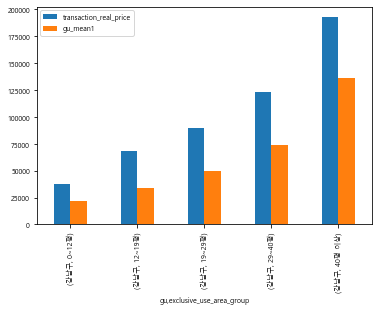

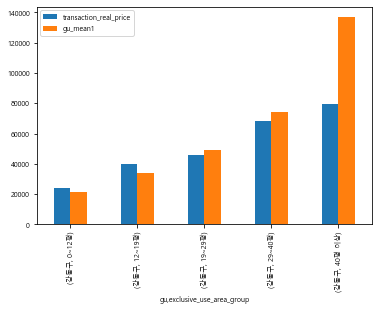

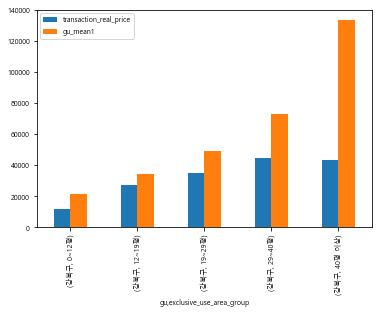

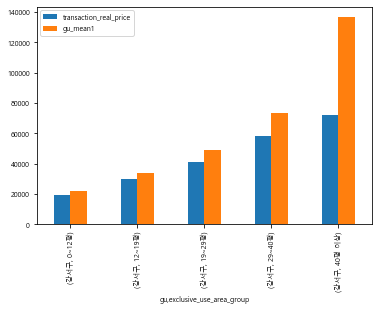

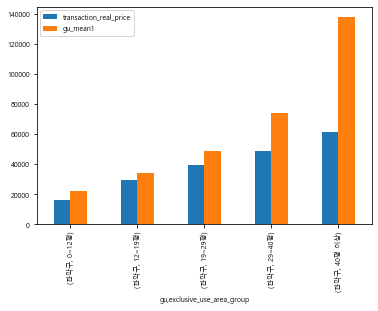

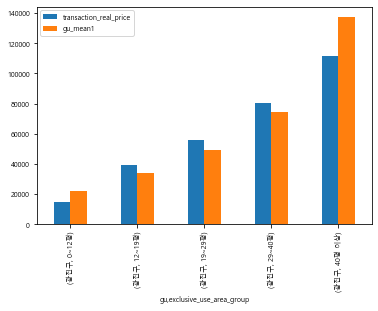

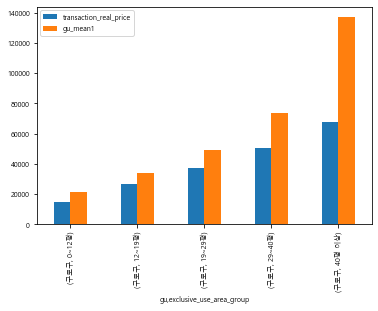

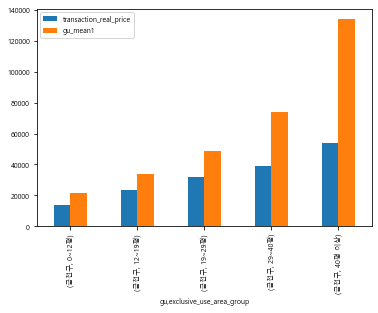

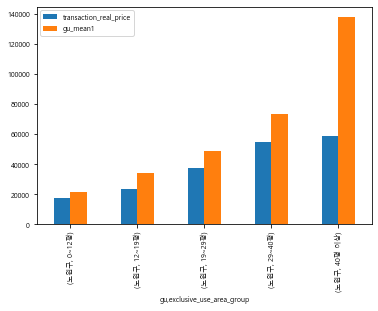

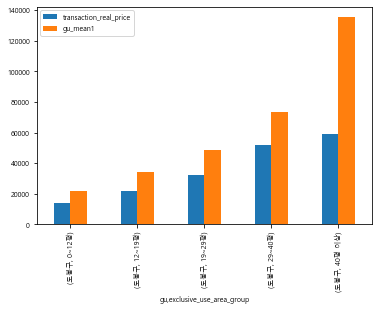

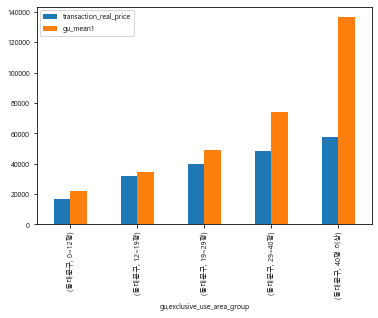

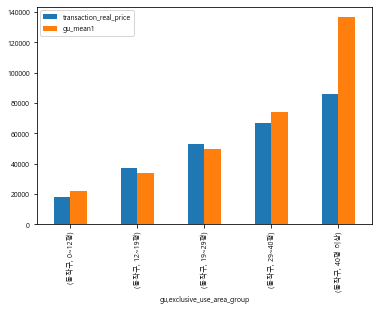

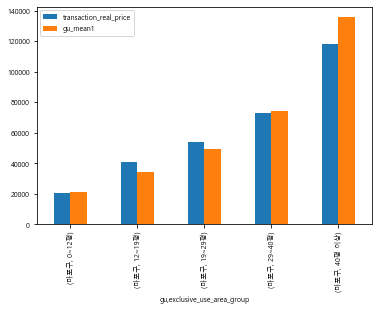

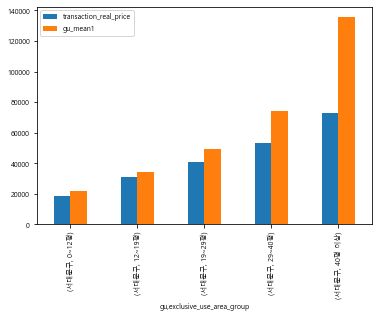

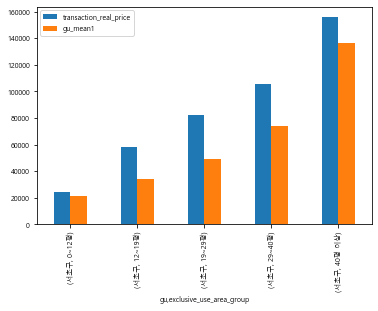

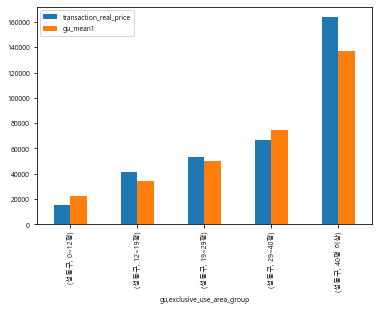

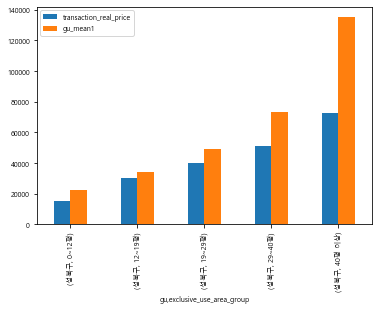

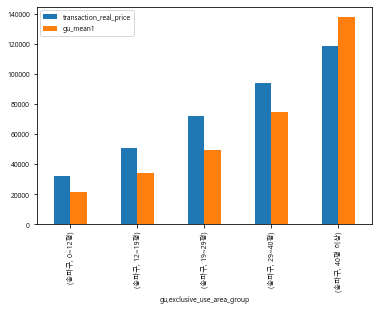

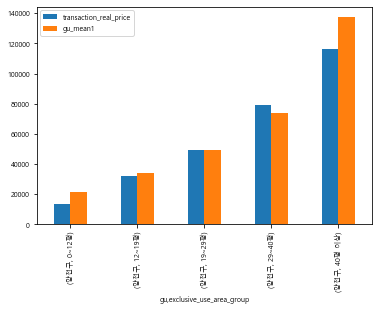

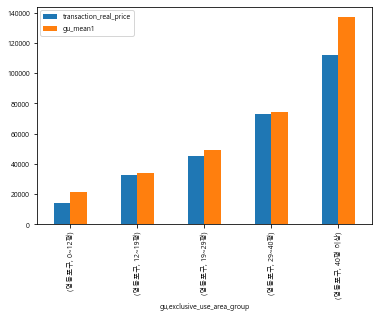

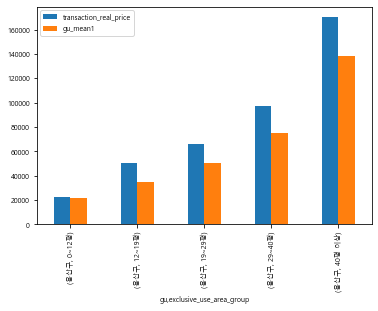

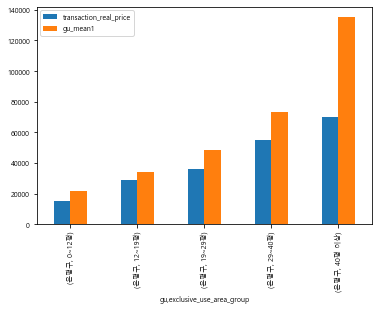

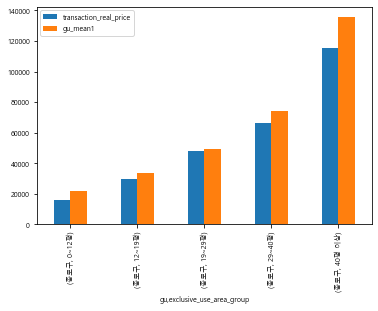

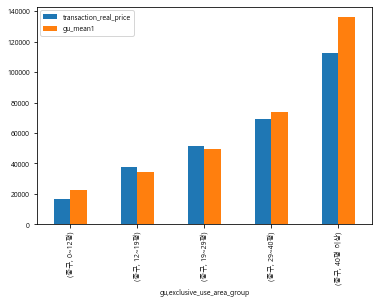

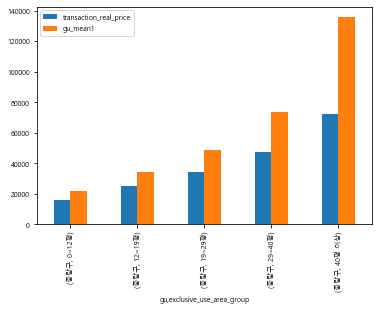

In [63]:
plt.rcParams.update({'font.size': 7})

train_gn.plot.bar()
train_gd.plot.bar()
train_gb.plot.bar()
train_gs.plot.bar()
train_ga.plot.bar()
train_gj.plot.bar()

train_gr.plot.bar()
train_gc.plot.bar()
train_nw.plot.bar()
train_db.plot.bar()
train_ddm.plot.bar()

train_dj.plot.bar()
train_mp.plot.bar()
train_sdm.plot.bar()
train_sc.plot.bar()
train_sd.plot.bar()

train_sb.plot.bar()
train_sp.plot.bar()
train_yc.plot.bar()
train_ydp.plot.bar()
train_ys.plot.bar()

train_ep.plot.bar()
train_jro.plot.bar()
train_j.plot.bar()
train_jr.plot.bar()


## 평수 년도별 가격 비교 전처리

In [66]:
gu_area_year = train.groupby(['exclusive_use_area_group','gu', 'transaction_year'])['transaction_real_price','gu_mean1'].mean()
gu_area_year = pd.DataFrame(gu_area_year)
gu_area_year

transaction_real_price  \
exclusive_use_area_group gu  transaction_year                           
0~12평                    강남구 2008                        27031.935599   
                             2009                        34307.544990   
                             2010                        33171.045603   
                             2011                        35643.421769   
                             2012                        34131.162791   
...                                                               ...   
40평 이상                   중랑구 2013                        75375.000000   
                             2014                        73039.166667   
                             2015                        52366.666667   
                             2016                        75922.153846   
                             2017                        85750.000000   

                                                    gu_mean1  
exclusive_use_area_group gu  transaction_year                 
0~12평                    강남구 2008               18292.784118  
                             2009               22378.875593  
                             2010               22087.991065  
                             2011               21949.552919  
                             2012               20712.876436  
...                                                      ...  
40평 이상                   중랑구 2013              128258.492638  
                             2014              131296.008996  
                             2015              130892.512145  
                             2016              140896.273153  
                             2017              157704.712073  

[1238 rows x 2 columns]

### 구별 거래량

In [113]:
gu_area_VR = train.groupby(['gu','transaction_year']).size()
gu_area_VR = pd.DataFrame(gu_area_VR)
gu_area_VR1= gu_area_VR.pivot_table(index = 'gu', columns = 'transaction_year')

In [233]:
gu_area_VR1

0                                                        
transaction_year  2008  2009  2010  2011  2012  2013  2014   2015   2016  2017
gu                                                                            
강남구               2587  6447  3797  3855  2659  4467  5768   7301   6685  6131
강동구               3312  5866  2776  3280  2480  3428  4386   6226   5847  5363
강북구               1028   921   606  1073   803  1314  1530   2538   1936  1605
강서구               3857  3817  2127  2955  2081  3832  4815   8310   7089  5003
관악구               1899  1969  1486  1838  1339  2137  2722   3879   3348  2874
광진구               1127  1748  1036  1081   793  1279  1792   2212   2244  2062
구로구               3214  2995  2031  2934  1819  3347  4516   6096   5645  4280
금천구               1208   854   621   881   696  1275  1409   2053   1725  1321
노원구               6603  6815  4091  5356  4287  6932  8444  11692  10918  9273
도봉구               3752  2984  1877  2663  2001  3252  3689   5149   4764  3775
동대문구              2048  1903  1261  1813  1380  2223  3057   4042   3810  3413
동작구               1776  2291  1431  1937  1432  2687  3317   4837   4577  3630
마포구               1929  2539  1474  1807  1457  2493  2802   4498   4222  3498
서대문구              1676  1565  1154  1423  1001  1639  2312   3340   3448  2573
서초구               1917  5104  3192  2801  1876  3432  4597   5488   4789  4325
성동구               1633  2378  1367  1702  1110  2231  3275   4418   4017  3956
성북구               2784  2852  2013  3009  2108  3956  4729   6177   5180  4320
송파구               2996  5964  3266  3643  3483  4975  5349   7495   7523  7079
양천구               2823  4664  2436  2546  2083  3158  3660   6080   5609  4159
영등포구              2657  3348  1762  2276  1626  2713  3681   5281   4648  3883
용산구                693  1345   744   798   609   915  1536   2201   2445  2079
은평구               2150  1848  1851  1894  1378  2393  2716   3815   3763  2269
종로구                451   514   335   470   407   523   684    837    827   667
중구                 501   708   449   509   474   857   903   1464   1410  1038
중랑구               2208  1751  1175  1836  1311  2136  3136   3925   3229  2788

In [186]:
gu_nam = ['강서구','양천구', '구로구','영등포구','금천구','동작구','관악구','서초구','강남구','송파구','강동구']

In [194]:
gu_nam_city = gu_area_VR1.loc[['강서구','양천구', '구로구','영등포구','금천구','동작구','관악구','서초구','강남구','송파구','강동구']]


In [228]:
gu_nam_city

gu                   강서구   양천구   구로구  영등포구   금천구   동작구   관악구   서초구   강남구  \
  transaction_year                                                         
0 2008              3857  2823  3214  2657  1208  1776  1899  1917  2587   
  2009              3817  4664  2995  3348   854  2291  1969  5104  6447   
  2010              2127  2436  2031  1762   621  1431  1486  3192  3797   
  2011              2955  2546  2934  2276   881  1937  1838  2801  3855   
  2012              2081  2083  1819  1626   696  1432  1339  1876  2659   
  2013              3832  3158  3347  2713  1275  2687  2137  3432  4467   
  2014              4815  3660  4516  3681  1409  3317  2722  4597  5768   
  2015              8310  6080  6096  5281  2053  4837  3879  5488  7301   
  2016              7089  5609  5645  4648  1725  4577  3348  4789  6685   
  2017              5003  4159  4280  3883  1321  3630  2874  4325  6131   

gu                   송파구   강동구  
  transaction_year              
0 2008              2996  3312  
  2009              5964  5866  
  2010              3266  2776  
  2011              3643  3280  
  2012              3483  2480  
  2013              4975  3428  
  2014              5349  4386  
  2015              7495  6226  
  2016              7523  5847  
  2017              7079  5363

In [203]:
gu_nam_city = gu_nam_city.T

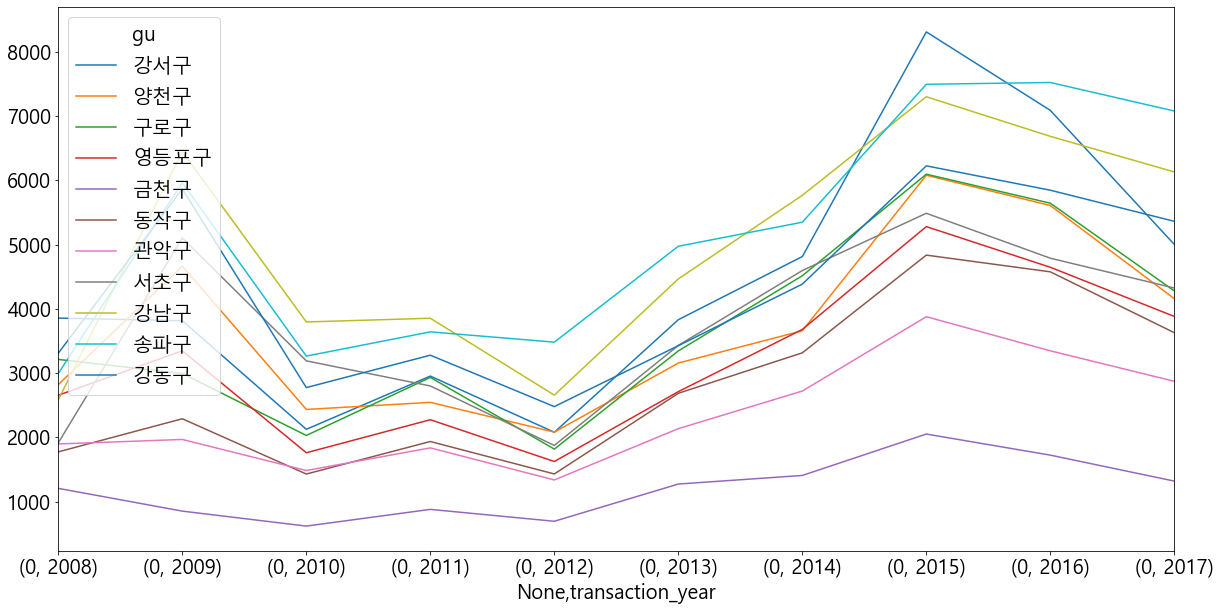

In [216]:
# 강남의 구별 거래량 비교
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [20, 10]
gu_nam_city.plot(kind = 'line')

In [234]:
# 강북의 구별 거래량 비교
gu_dukk_city = gu_area_VR1.loc[['강북구','광진구','노원구','도봉구','동대문구','마포구','서대문구','성동구','성북구','용산구','은평구','종로구','중구','중랑구']]

In [235]:
gu_dukk_city

0                                                        
transaction_year  2008  2009  2010  2011  2012  2013  2014   2015   2016  2017
gu                                                                            
강북구               1028   921   606  1073   803  1314  1530   2538   1936  1605
광진구               1127  1748  1036  1081   793  1279  1792   2212   2244  2062
노원구               6603  6815  4091  5356  4287  6932  8444  11692  10918  9273
도봉구               3752  2984  1877  2663  2001  3252  3689   5149   4764  3775
동대문구              2048  1903  1261  1813  1380  2223  3057   4042   3810  3413
마포구               1929  2539  1474  1807  1457  2493  2802   4498   4222  3498
서대문구              1676  1565  1154  1423  1001  1639  2312   3340   3448  2573
성동구               1633  2378  1367  1702  1110  2231  3275   4418   4017  3956
성북구               2784  2852  2013  3009  2108  3956  4729   6177   5180  4320
용산구                693  1345   744   798   609   915  1536   2201   2445  2079
은평구               2150  1848  1851  1894  1378  2393  2716   3815   3763  2269
종로구                451   514   335   470   407   523   684    837    827   667
중구                 501   708   449   509   474   857   903   1464   1410  1038
중랑구               2208  1751  1175  1836  1311  2136  3136   3925   3229  2788

In [236]:
gu_dukk_city = gu_dukk_city.T

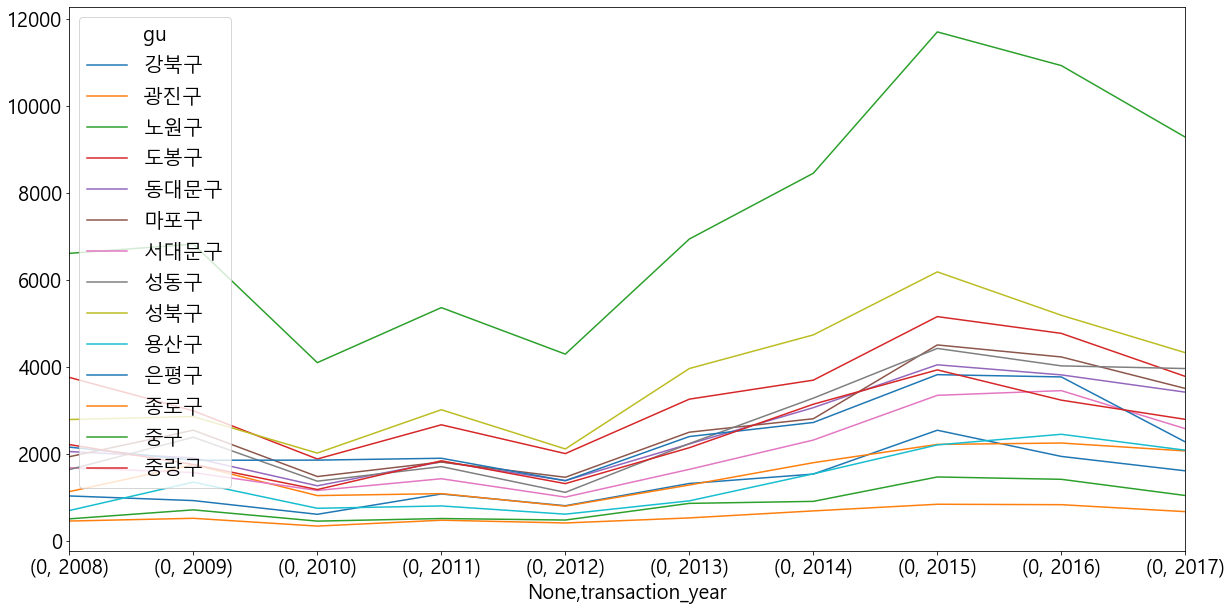

In [238]:
# 강북의 구별 거래량 비교
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [20, 10]
gu_dukk_city.plot(kind = 'line')

In [209]:
gu_area_VR1 = gu_area_VR1.T

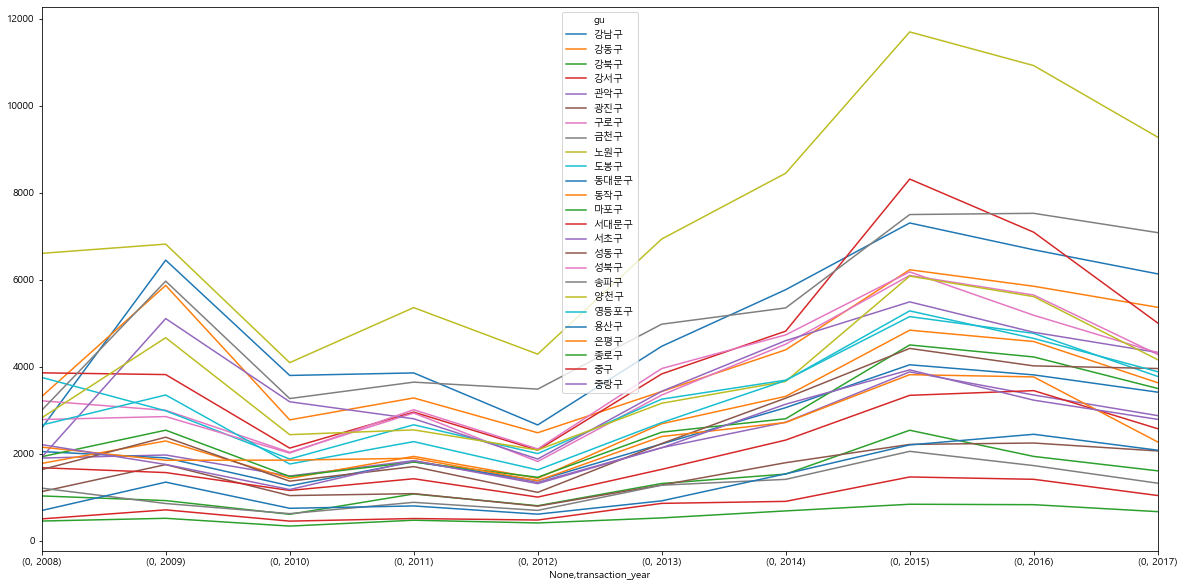

In [219]:
# 전체 구별 거래량 비교
plt.rcParams.update({'font.size':10})

plt.rcParams['figure.figsize'] = [20, 10]
gu_area_VR1.plot(kind = 'line')

In [44]:
# 강남 거래량 비교
gu_area_VR = train.groupby(['gu','transaction_year']).size()
gu_area_VR = pd.DataFrame(gu_area_VR)
gu_area_VR1= gu_area_VR.pivot_table(index ='transaction_year' , columns = 'gu')

### 주민등록세대주와 거래량 간의 상관관계

In [35]:
jumin = pd.read_csv('C:\\Users\\acorn\\python\\city\\주민등록세대수2008_2017_1.csv', index_col = [0], encoding = 'euc-kr')
jumin

,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
년도,,,,,,,,,,,,,,,,,,,,,
2008,4097562,74660,58174,106966,128658,155676,156267,171183,190713,136300,...,223026,165750,100138,168187,163742,241511,159907,227533,256104,178232
2009,4116660,74315,58249,107456,126670,156140,153437,171448,192990,136779,...,221975,167404,100285,168099,163344,241873,166405,229431,260681,184793
2010,4224181,77621,61468,113204,129644,159675,158485,176096,201489,142711,...,225313,170317,103412,171791,167887,247588,170882,234345,264364,190152
2011,4192752,76688,61475,112617,126148,158472,157823,175115,199398,142527,...,223490,171064,103600,168850,167099,246979,168988,231983,261963,190392
2012,4177970,75659,61546,110706,125848,158534,157650,174313,197992,142150,...,223708,171498,104357,167685,169293,247598,168878,230755,257852,187490
2013,4182351,73693,60600,109361,126447,159173,159256,174938,196693,141246,...,226607,171419,104179,167761,172700,248006,170594,230645,257441,186764
2014,4194176,73101,59960,108429,125814,158524,159880,176714,193359,141246,...,234378,172594,103940,168100,172389,248180,173469,237375,257207,185905
2015,4189948,72645,59321,107512,126714,158353,159941,176390,190973,141088,...,238952,172321,103847,167863,170495,249191,173007,237373,256611,180508
2016,4189839,72118,59651,106607,128727,158390,159426,177400,188304,141229,...,245045,172220,104483,165729,172506,251955,173970,234080,258382,177460


In [52]:

#gu_area_VR1.reset_index(inplace = True)

#gu_area_VR2 = gu_area_VR1.set_index('transaction_year')
#gu_area_VR1 = gu_area_VR1.T
#gu_area_VR1.drop('level_0', inplace = True, axis =1)
#gu_area_VR1.set_index('gu',drop=True, inplace = True)
#gu_area_VR1

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
transaction_year,,,,,,,,,,,,,,,,,,,,,
2008,2587,3312,1028,3857,1899,1127,3214,1208,6603,3752,...,1633,2784,2996,2823,2657,693,2150,451,501,2208
2009,6447,5866,921,3817,1969,1748,2995,854,6815,2984,...,2378,2852,5964,4664,3348,1345,1848,514,708,1751
2010,3797,2776,606,2127,1486,1036,2031,621,4091,1877,...,1367,2013,3266,2436,1762,744,1851,335,449,1175
2011,3855,3280,1073,2955,1838,1081,2934,881,5356,2663,...,1702,3009,3643,2546,2276,798,1894,470,509,1836
2012,2659,2480,803,2081,1339,793,1819,696,4287,2001,...,1110,2108,3483,2083,1626,609,1378,407,474,1311
2013,4467,3428,1314,3832,2137,1279,3347,1275,6932,3252,...,2231,3956,4975,3158,2713,915,2393,523,857,2136
2014,5768,4386,1530,4815,2722,1792,4516,1409,8444,3689,...,3275,4729,5349,3660,3681,1536,2716,684,903,3136
2015,7301,6226,2538,8310,3879,2212,6096,2053,11692,5149,...,4418,6177,7495,6080,5281,2201,3815,837,1464,3925
2016,6685,5847,1936,7089,3348,2244,5645,1725,10918,4764,...,4017,5180,7523,5609,4648,2445,3763,827,1410,3229


C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


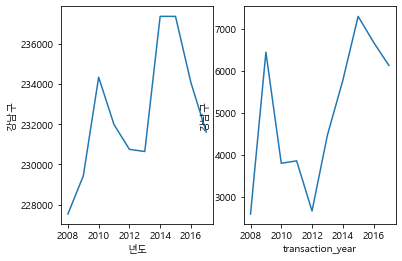

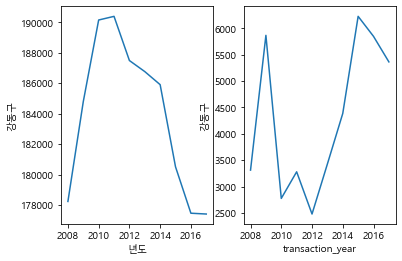

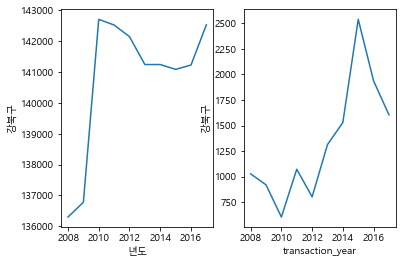

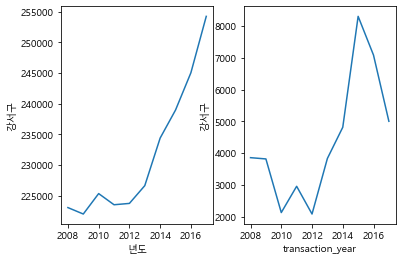

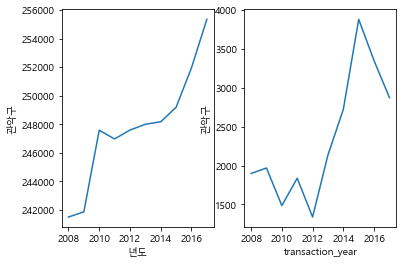

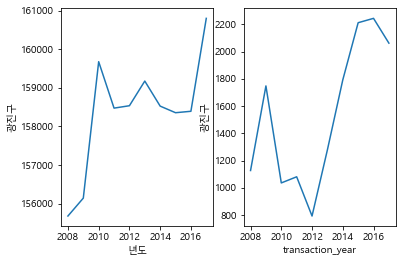

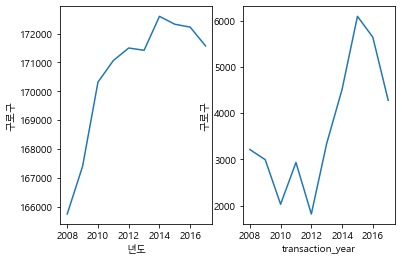

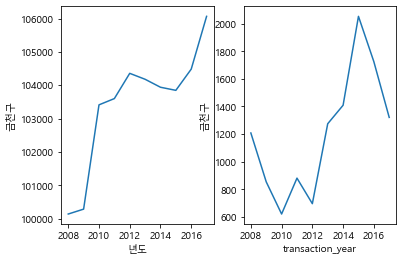

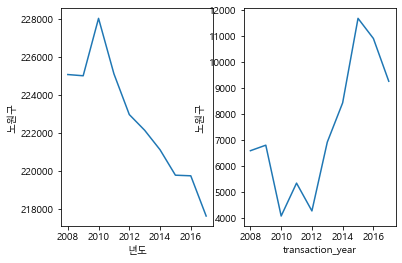

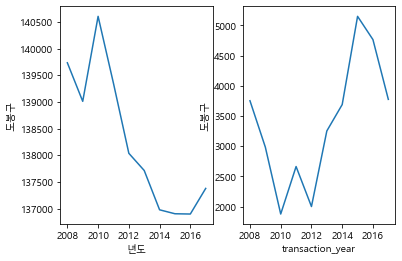

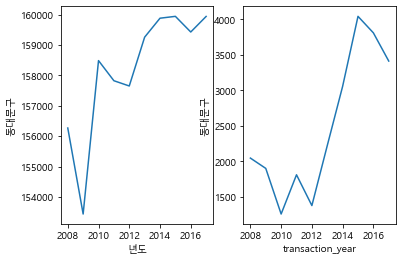

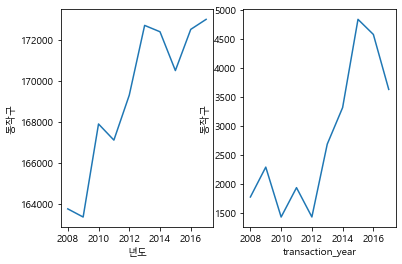

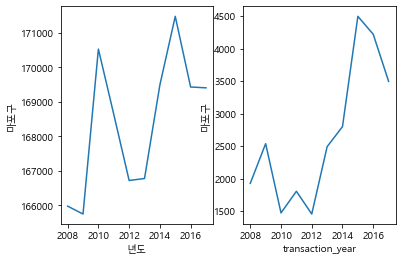

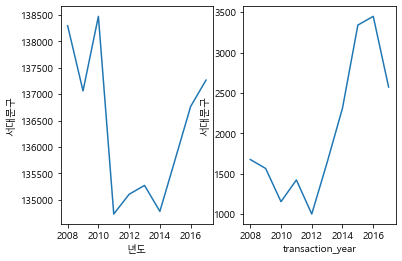

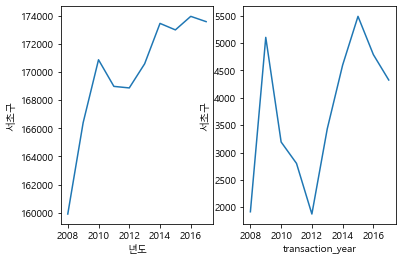

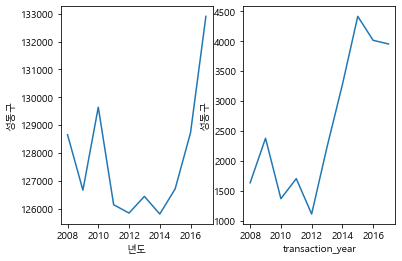

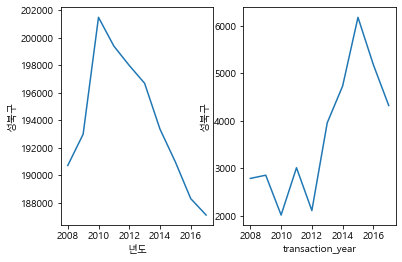

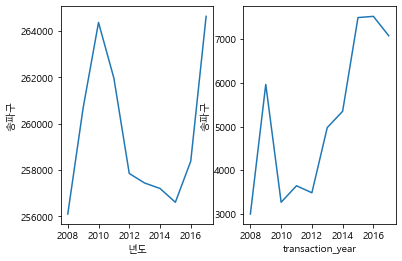

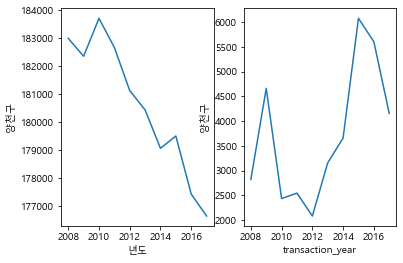

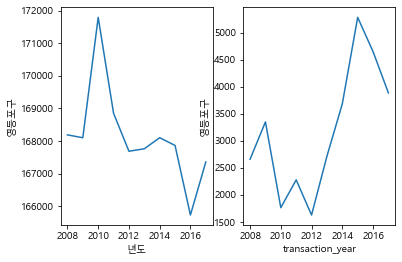

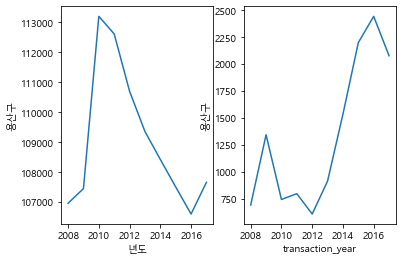

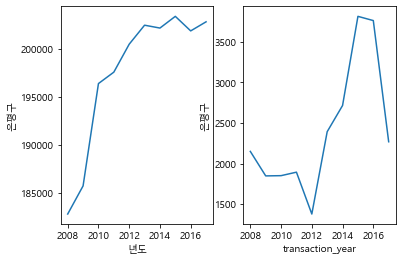

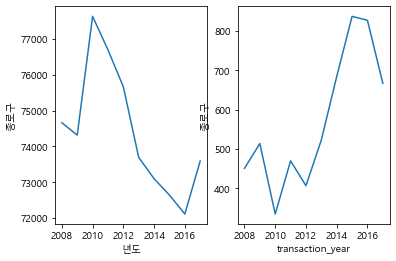

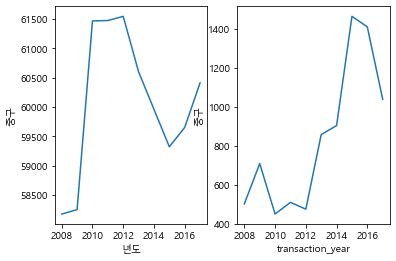

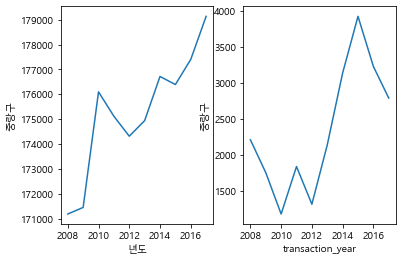

In [55]:
for i in gu_name:
    fig, ax = plt.subplots(ncols=2)
    sns.lineplot(x = jumin.index, y = i, data = jumin, ax=ax[0])
    sns.lineplot(x = gu_area_VR1.index, y = i, data = gu_area_VR1, ax=ax[1])

In [65]:
year_count_pb = train.pivot_table('transaction_real_price', 'transaction_year', 'gu')
year_count_pb

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
transaction_year,,,,,,,,,,,,,,,,,,,,,
2008,75457.958253,39736.179952,31569.053502,29791.203267,34471.134281,49645.463177,30082.886434,27110.702815,29912.744813,28888.933902,...,44535.757502,33876.484195,60641.735981,40647.801984,40931.029733,71503.650794,33927.208372,37679.711752,41941.712575,28631.130435
2009,90188.709167,43940.991135,31230.081433,34816.102698,35939.084815,52629.732265,33475.437730,27176.742389,29854.573441,29572.612265,...,47377.539108,35203.453015,68306.042086,52635.917024,47498.133513,82881.391078,37178.656385,45436.050584,46569.481638,29390.595660
2010,86806.669739,43784.698847,30773.135314,34307.095910,34969.837147,58244.761583,31443.866568,27001.436393,28052.366414,27435.140650,...,46105.878566,34756.217586,69457.489590,52527.769704,48822.383655,80262.268817,41624.227985,44141.110448,50899.559020,29444.583830
2011,84594.812192,43216.223171,30618.275862,33858.326227,35516.681175,53639.918594,32068.490116,26393.745743,27577.470127,26811.930154,...,45482.726204,36664.156530,66355.613505,48418.779262,45292.729789,74893.587719,36764.042239,46668.187234,46019.514735,29981.626362
2012,82886.498308,43429.432661,29775.947696,31820.583854,32437.216580,54153.407314,30370.346894,25514.827586,25188.641241,25252.908546,...,48726.797297,34143.681689,64366.461384,46548.734037,40404.643911,71064.142857,34663.732221,51981.132678,54299.135021,28700.549199
2013,83913.159167,41704.443699,30527.198630,32610.086117,32880.744034,51540.749805,31095.294592,25144.621961,26418.103145,25925.354244,...,47292.557149,34348.511375,63614.731859,45030.295440,40516.530778,66251.561749,34114.941914,50794.116635,53869.497083,28684.716760
2014,88741.570215,42420.851801,31818.686275,34423.833437,34675.954445,54675.742188,32343.211027,26206.183818,27109.904192,26504.380049,...,50539.337099,36160.960880,63406.601608,46775.589891,42131.484923,76829.724609,34489.003314,45210.467836,50396.318937,30510.663584
2015,94179.803041,45845.906842,32595.124113,36274.828881,36546.042795,56411.763110,33595.224081,28556.154895,28717.292679,27702.811225,...,52869.107741,39238.753602,66834.411875,48071.187500,44411.431547,76804.841436,36251.087811,48914.832736,53802.687158,30081.518981
2016,107857.837397,50532.692834,35755.899277,42434.923120,38231.220430,60123.396613,35941.658636,31647.292174,31053.400348,29822.300378,...,58181.867812,42873.981274,73989.600957,53593.143519,49725.889200,95996.050307,40667.371512,54587.409915,60865.685106,32357.179003


C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


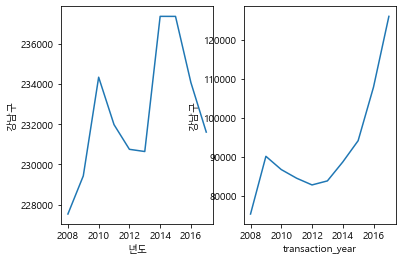

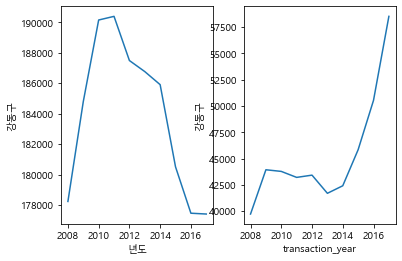

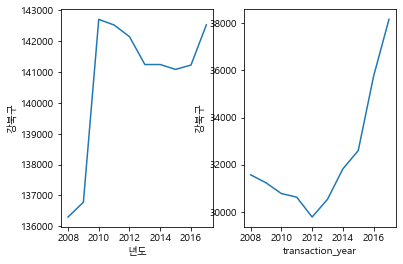

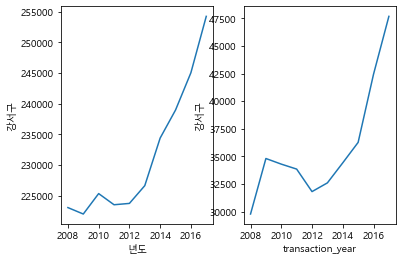

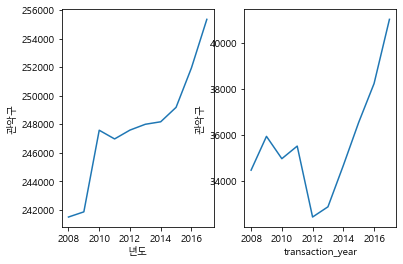

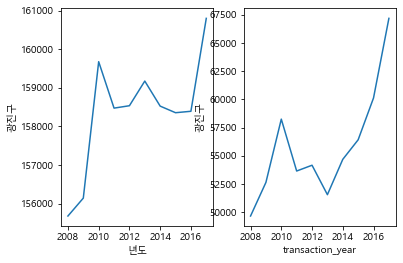

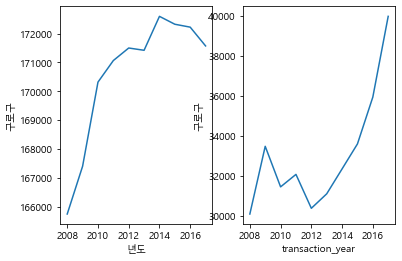

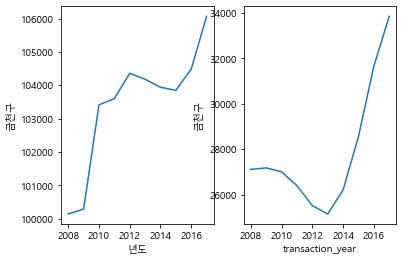

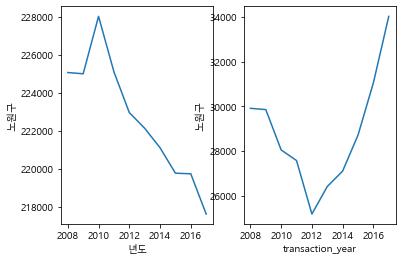

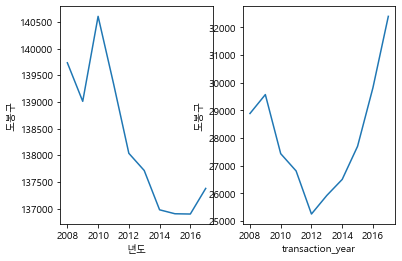

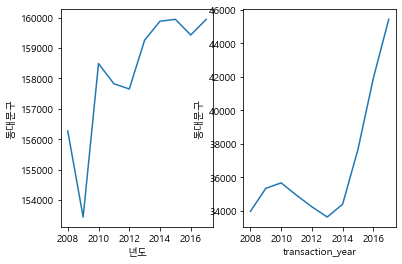

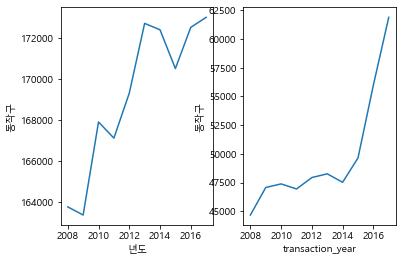

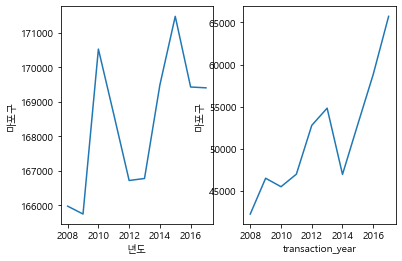

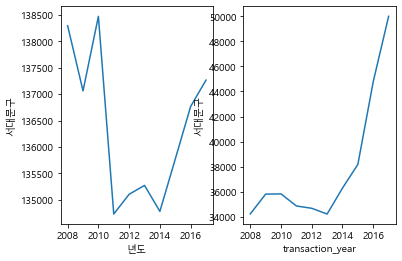

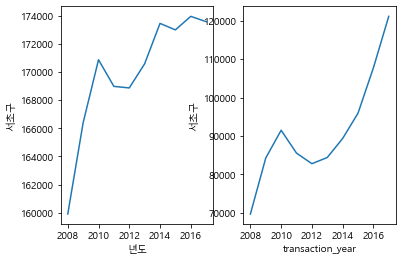

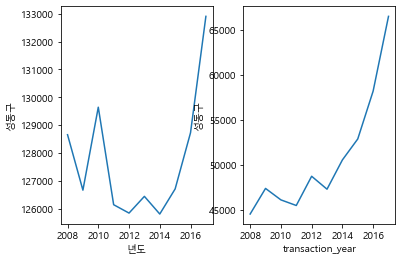

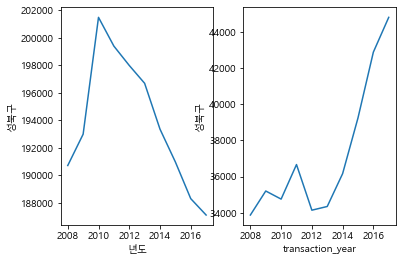

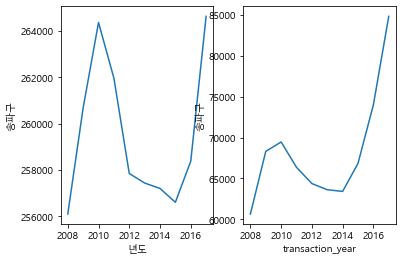

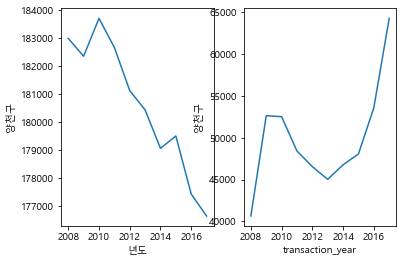

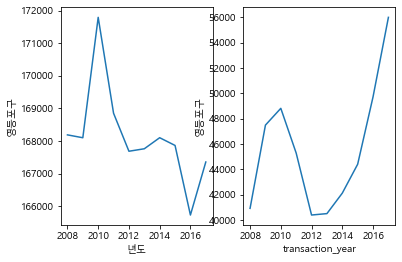

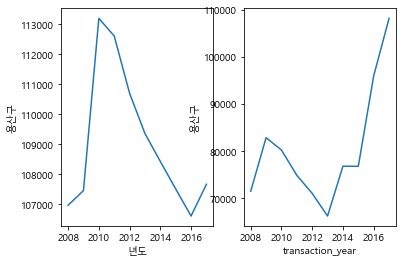

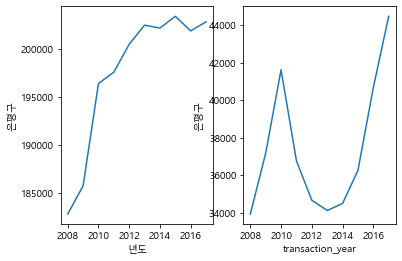

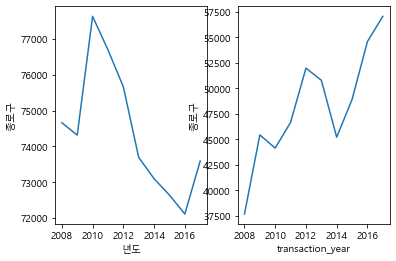

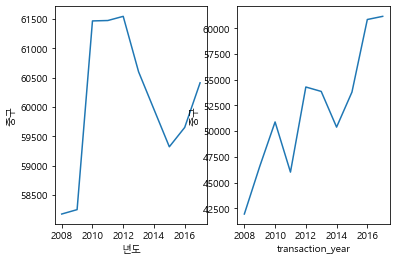

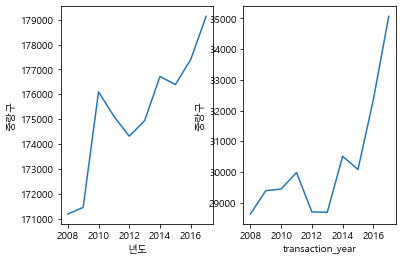

In [66]:
for i in gu_name:
    fig, ax = plt.subplots(ncols=2)
    sns.lineplot(x = jumin.index, y = i, data = jumin, ax=ax[0])
    sns.lineplot(x = year_count_pb.index, y = i, data = year_count_pb, ax=ax[1])

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


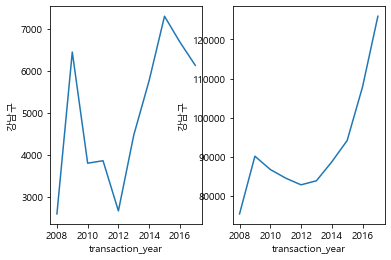

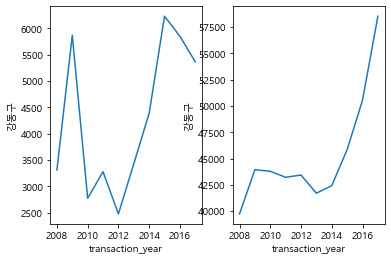

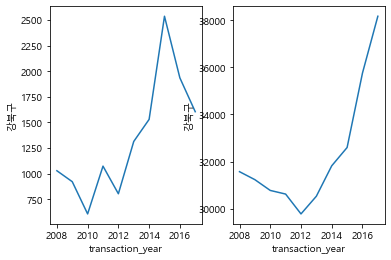

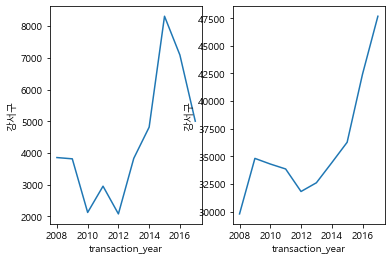

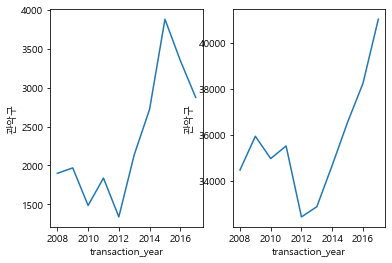

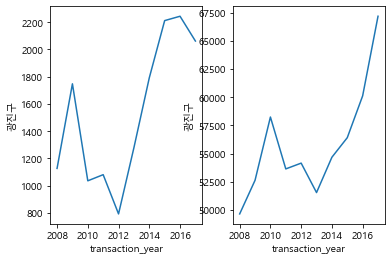

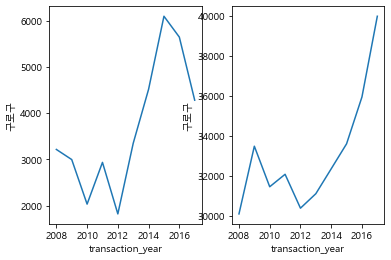

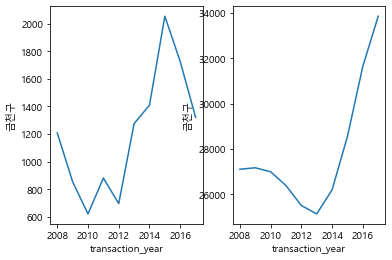

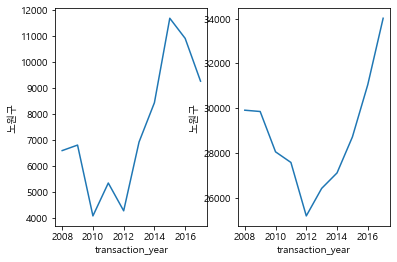

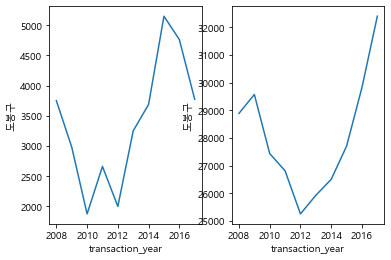

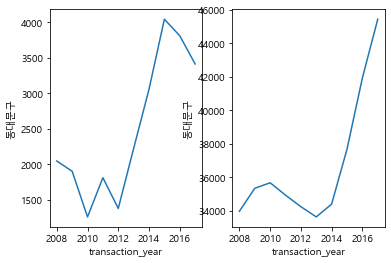

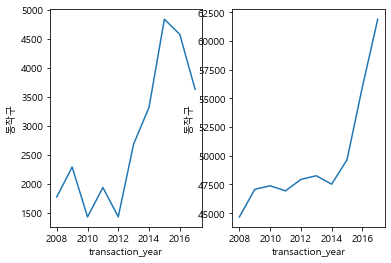

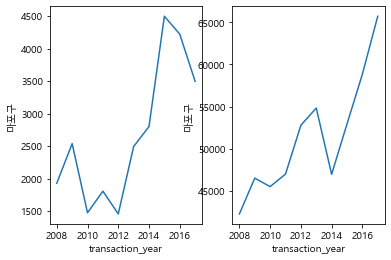

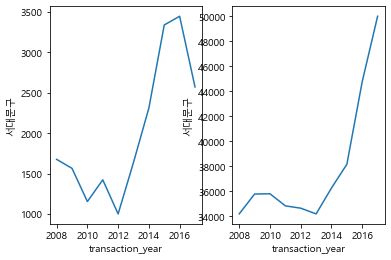

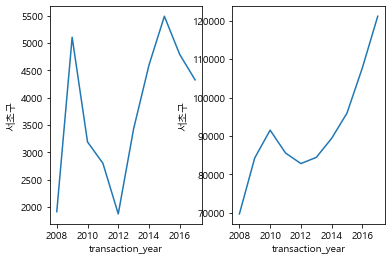

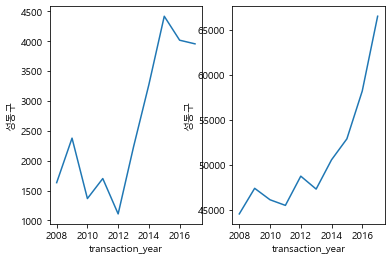

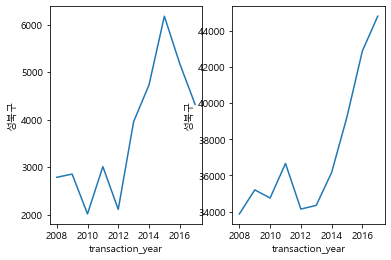

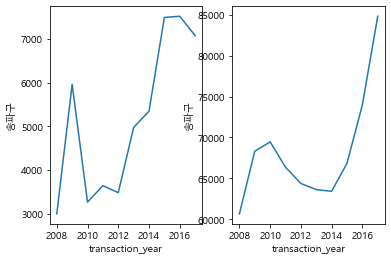

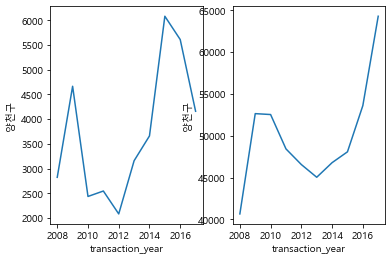

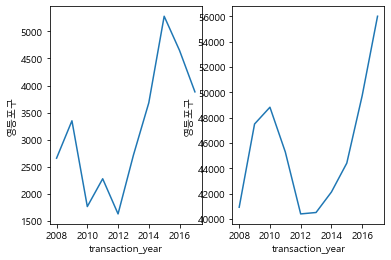

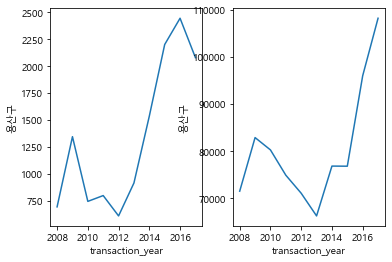

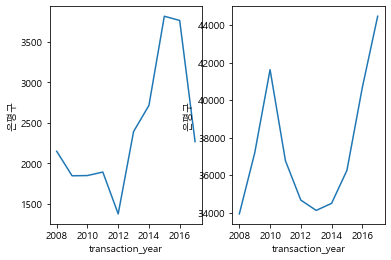

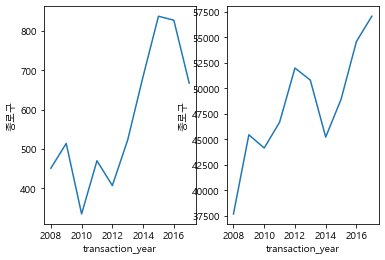

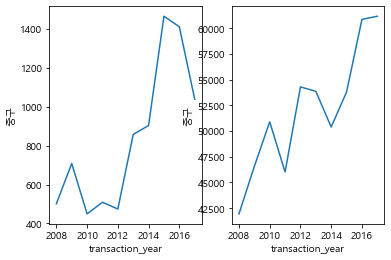

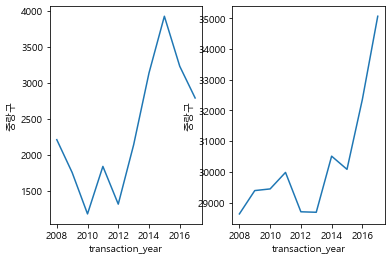

In [67]:
for i in gu_name:
    fig, ax = plt.subplots(ncols=2)
    sns.lineplot(x = gu_area_VR1.index, y = i, data = gu_area_VR1, ax=ax[0])
    sns.lineplot(x = year_count_pb.index, y = i, data = year_count_pb, ax=ax[1])

## 구별 평당 가격 상승률

In [6]:
gu_area_price = train.groupby(['gu','exclusive_use_area_group','transaction_year'])['transaction_real_price'].mean()
gu_area_price=pd.DataFrame(gu_area_price)
gu_area_price

transaction_real_price
gu  exclusive_use_area_group transaction_year                        
강남구 0~12평                    2008                        27031.935599
                             2009                        34307.544990
                             2010                        33171.045603
                             2011                        35643.421769
                             2012                        34131.162791
...                                                               ...
중랑구 40평 이상                   2013                        75375.000000
                             2014                        73039.166667
                             2015                        52366.666667
                             2016                        75922.153846
                             2017                        85750.000000

[1238 rows x 1 columns]

In [85]:

gu_n = ['gn', 'gd','gb','gs','gc','gj','gr','gch','nw','db','ddm','dj','mp','sdm','scho','jdong','sb','sp','yc','ydp','ys','ep','jro','j','jr']

In [94]:
train_gn=gu_area_price.loc[['강남구']]
train_gd=gu_area_price.loc[['강동구']]
train_gb=gu_area_price.loc[['강북구']]
train_gs=gu_area_price.loc[['강서구']]
train_gc=gu_area_price.loc[['관악구']]
train_gj=gu_area_price.loc[['광진구']]
train_gr=gu_area_price.loc[['구로구']]
train_gch=gu_area_price.loc[['금천구']]
train_nw=gu_area_price.loc[['노원구']]
train_db=gu_area_price.loc[['도봉구']]
train_ddm=gu_area_price.loc[['동대문구']]
train_dj=gu_area_price.loc[['동작구']]
train_mp=gu_area_price.loc[['마포구']]
train_sdm=gu_area_price.loc[['서대문구']]
train_sc=gu_area_price.loc[['서초구']]
train_sd=gu_area_price.loc[['성동구']]
train_sb=gu_area_price.loc[['성북구']]
train_sp=gu_area_price.loc[['송파구']]
train_yc=gu_area_price.loc[['양천구']]
train_ydp=gu_area_price.loc[['영등포구']]
train_ys=gu_area_price.loc[['용산구']]
train_ep=gu_area_price.loc[['은평구']]
train_jr=gu_area_price.loc[['종로구']]
train_j=gu_area_price.loc[['중구']]
train_jrang=gu_area_price.loc[['중랑구']]

In [9]:
area_group = ['0~12평', '12~19평', '19~29평', '29~40평','40평 이상']

#### 빈값채우기

In [ ]:
train_gb.loc['강북구','0~12평',2010] = 16917.565526

train_gb.sort_values(by = ['exclusive_use_area_group','transaction_year'], inplace = True)

In [ ]:
train_gj.loc['광진구','0~12평',2008] = 19652.86647

train_gj.loc['광진구','0~12평',2010] = 24666.78694

train_gj.loc['광진구','0~12평',2011] = 24269.00245
train_gj.sort_values(by = ['exclusive_use_area_group','transaction_year'], inplace = True)

In [ ]:
train_sd.loc['성동구','0~12평',2008] = 15999.029070

train_sd.loc['성동구','0~12평',2010] = 19388.611111

train_sd.loc['성동구','0~12평',2011] = 21145.238095
train_sd.sort_values(by = ['exclusive_use_area_group','transaction_year'], inplace = True)

In [ ]:
train_gch.loc['금천구','40평 이상',2009] = 73667.500000

train_gch.loc['금천구','40평 이상',2010] = 66003.586207

train_gch.loc['금천구','40평 이상',2012] = 62382.500000

train_gch.loc['금천구','40평 이상',2014] = 65801.833333


train_gch.sort_values(by = ['exclusive_use_area_group','transaction_year'], inplace = True)

#### 강남구

In [54]:
first = []
for i in area_group:
    num = (train_gn.loc['강남구',i, 2010]/train_gn.loc['강남구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gn.loc['강남구',i, 2013]/train_gn.loc['강남구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gn.loc['강남구',i, 2017]/train_gn.loc['강남구', i,2014])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [55]:
area_increase1_gn = pd.DataFrame(first)
area_increase2_gn = pd.DataFrame(second)
area_increase3_gn = pd.DataFrame(third)
area_increase_gn = pd.merge(area_increase1_gn, area_increase2_gn, on =0)
area_increase_gn = pd.merge(area_increase_gn, area_increase3_gn, on =0)
area_increase_gn.columns = ['area','2008-2010','2011-2013','2014-2017']

In [56]:
area_increase_gn['city'] = '강남구'
area_increase_gn

,area,2008-2010,2011-2013,2014-2017,city
0,0~12평,0.07060,-0.01232,0.17387,강남구
1,12~19평,0.03590,-0.02124,0.14362,강남구
2,19~29평,0.03190,-0.02213,0.13397,강남구
3,29~40평,0.03061,-0.01612,0.11346,강남구
4,40평 이상,0.00386,-0.01220,0.06494,강남구


#### 강동구

In [15]:
first = []
for i in area_group:
    num = (train_gd.loc['강동구',i, 2010]/train_gd.loc['강동구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gd.loc['강동구',i, 2013]/train_gd.loc['강동구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gd.loc['강동구',i, 2017]/train_gd.loc['강동구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [16]:
area_increase1_gd = pd.DataFrame(first)
area_increase2_gd = pd.DataFrame(second)
area_increase3_gd = pd.DataFrame(third)
area_increase_gd = pd.merge(area_increase1_gd, area_increase2_gd, on =0)
area_increase_gd = pd.merge(area_increase_gd, area_increase3_gd, on =0)
area_increase_gd.columns = ['area','2008-2010','2010-2013','2013-2017']

In [17]:
area_increase_gd['city'] = '강동구'
area_increase_gd

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.06673,-0.02040,0.01393,강동구
1,12~19평,0.02873,-0.00461,0.10341,강동구
2,19~29평,0.03440,0.00213,0.11339,강동구
3,29~40평,0.02992,-0.00771,0.10074,강동구
4,40평 이상,0.04333,0.13725,0.05410,강동구


#### 강북구

In [43]:
first = []
for i in area_group:
    num = (train_gb.loc['강북구',i, 2010]/train_gb.loc['강북구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gb.loc['강북구',i, 2012]/train_gb.loc['강북구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gb.loc['강북구',i, 2017]/train_gb.loc['강북구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [44]:
area_increase1_gb = pd.DataFrame(first)
area_increase2_gb = pd.DataFrame(second)
area_increase3_gb = pd.DataFrame(third)
area_increase_gb = pd.merge(area_increase1_gb, area_increase2_gb, on =0)
area_increase_gb = pd.merge(area_increase_gb, area_increase3_gb, on =0)
area_increase_gb.columns = ['area','2008-2010','2010-2013','2013-2017']

In [45]:
area_increase_gd['city'] = '강북구'
area_increase_gd

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.06673,-0.02040,0.01393,강북구
1,12~19평,0.02873,-0.00461,0.10341,강북구
2,19~29평,0.03440,0.00213,0.11339,강북구
3,29~40평,0.02992,-0.00771,0.10074,강북구
4,40평 이상,0.04333,0.13725,0.05410,강북구


#### 강서구

In [46]:
first = []
for i in area_group:
    num = (train_gs.loc['강서구',i, 2010]/train_gs.loc['강서구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gs.loc['강서구',i, 2012]/train_gs.loc['강서구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gs.loc['강서구',i, 2017]/train_gs.loc['강서구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [47]:
area_increase1_gs = pd.DataFrame(first)
area_increase2_gs = pd.DataFrame(second)
area_increase3_gs = pd.DataFrame(third)
area_increase_gs = pd.merge(area_increase1_gs, area_increase2_gs, on =0)
area_increase_gs = pd.merge(area_increase_gs, area_increase3_gs, on =0)
area_increase_gs.columns = ['area','2008-2010','2010-2013','2013-2017']

In [48]:
area_increase_gs['city'] = '강서구'
area_increase_gs

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.02055,-0.01215,0.20405,강서구
1,12~19평,0.02614,-0.02070,0.14405,강서구
2,19~29평,0.03761,-0.02017,0.12960,강서구
3,29~40평,0.00252,-0.02689,0.07983,강서구
4,40평 이상,-0.06406,-0.02394,0.06880,강서구


#### 관악구

In [51]:
first = []
for i in area_group:
    num = (train_gc.loc['관악구',i, 2010]/train_gc.loc['관악구', i,2008])**(1/3)-1
    first.append(
        [i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gc.loc['관악구',i, 2012]/train_gc.loc['관악구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gc.loc['관악구',i, 2017]/train_gc.loc['관악구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [52]:
area_increase1_gc = pd.DataFrame(first)
area_increase2_gc = pd.DataFrame(second)
area_increase3_gc = pd.DataFrame(third)
area_increase_gc = pd.merge(area_increase1_gc, area_increase2_gc, on =0)
area_increase_gc = pd.merge(area_increase_gc, area_increase3_gc, on =0)
area_increase_gc.columns = ['area','2008-2010','2010-2013','2013-2017']

In [53]:
area_increase_gc['city'] = '관악구'
area_increase_gc

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.02180,-0.06331,0.07757,관악구
1,12~19평,0.00888,-0.01566,0.06694,관악구
2,19~29평,-0.00032,-0.01973,0.07399,관악구
3,29~40평,-0.01959,-0.03656,0.05799,관악구
4,40평 이상,0.07745,0.05939,0.05266,관악구


#### 광진구

In [347]:
first = []
for i in area_group:
    num = (train_gj.loc['광진구',i, 2010]/train_gj.loc['광진구', i,2008])**(1/3)-1
    first.append(
        [i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gj.loc['광진구',i, 2012]/train_gj.loc['광진구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gj.loc['광진구',i, 2017]/train_gj.loc['광진구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [348]:
area_increase1_gj = pd.DataFrame(first)
area_increase2_gj = pd.DataFrame(second)
area_increase3_gj = pd.DataFrame(third)
area_increase_gj = pd.merge(area_increase1_gj, area_increase2_gj, on =0)
area_increase_gj = pd.merge(area_increase_gj, area_increase3_gj, on =0)
area_increase_gj.columns = ['area','2008-2010','2010-2013','2013-2017']

In [349]:
area_increase_gj['city'] = '광진구'
area_increase_gj

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.07869,-0.25195,0.19280,광진구
1,12~19평,0.00693,-0.00624,0.08781,광진구
2,19~29평,0.01147,-0.01455,0.08378,광진구
3,29~40평,0.03249,0.01435,0.05852,광진구
4,40평 이상,0.06535,-0.06159,0.07032,광진구


#### 구로구

In [127]:
first = []
for i in area_group:
    num = (train_gr.loc['구로구',i, 2010]/train_gr.loc['구로구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gr.loc['구로구',i, 2012]/train_gr.loc['구로구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gr.loc['구로구',i, 2017]/train_gr.loc['구로구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [128]:
area_increase1_gr = pd.DataFrame(first)
area_increase2_gr = pd.DataFrame(second)
area_increase3_gr = pd.DataFrame(third)
area_increase_gr = pd.merge(area_increase1_gr, area_increase2_gr, on =0)
area_increase_gr = pd.merge(area_increase_gr, area_increase3_gr, on =0)
area_increase_gr.columns = ['area','2008-2010','2010-2013','2013-2017']

In [129]:
area_increase_gr['city'] = '구로구'
area_increase_gr

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.08370,-0.00030,0.04609,구로구
1,12~19평,0.00984,-0.00254,0.08835,구로구
2,19~29평,0.01055,-0.01105,0.07772,구로구
3,29~40평,-0.00746,0.00015,0.06571,구로구
4,40평 이상,-0.04475,-0.01582,0.00727,구로구


#### 금천구

In [344]:
first = []
for i in area_group:
    num = (train_gch.loc['금천구',i, 2010]/train_gch.loc['금천구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_gch.loc['금천구',i, 2012]/train_gch.loc['금천구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_gch.loc['금천구',i, 2017]/train_gch.loc['금천구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [345]:
area_increase1_gch = pd.DataFrame(first)
area_increase2_gch = pd.DataFrame(second)
area_increase3_gch = pd.DataFrame(third)
area_increase_gch = pd.merge(area_increase1_gch, area_increase2_gch, on =0)
area_increase_gch = pd.merge(area_increase_gch, area_increase3_gch, on =0)
area_increase_gch.columns = ['area','2008-2010','2010-2013','2013-2017']

In [346]:
area_increase_gch['city'] = '금천구'
area_increase_gch

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.00677,-0.02039,0.08100,금천구
1,12~19평,0.00291,-0.01841,0.11275,금천구
2,19~29평,-0.00799,-0.01196,0.08981,금천구
3,29~40평,-0.03075,-0.03414,0.09132,금천구
4,40평 이상,0.21499,-0.01938,0.24108,금천구


#### 노원구

In [131]:
first = []
for i in area_group:
    num = (train_nw.loc['노원구',i, 2010]/train_nw.loc['노원구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_nw.loc['노원구',i, 2012]/train_nw.loc['노원구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_nw.loc['노원구',i, 2017]/train_nw.loc['노원구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [132]:
area_increase1_nw = pd.DataFrame(first)
area_increase2_nw = pd.DataFrame(second)
area_increase3_nw = pd.DataFrame(third)
area_increase_nw = pd.merge(area_increase1_nw, area_increase2_nw, on =0)
area_increase_nw = pd.merge(area_increase_nw, area_increase3_nw, on =0)
area_increase_nw.columns = ['area','2008-2010','2010-2013','2013-2017']

In [133]:
area_increase_nw['city'] = '노원구'
area_increase_nw

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,-0.00615,-0.02616,0.14273,노원구
1,12~19평,-0.00602,-0.02344,0.10933,노원구
2,19~29평,0.00103,-0.02745,0.07501,노원구
3,29~40평,-0.01235,-0.05264,0.04351,노원구
4,40평 이상,0.00191,-0.04421,0.01871,노원구


#### 도봉구

In [134]:
first = []
for i in area_group:
    num = (train_db.loc['도봉구',i, 2010]/train_db.loc['도봉구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_db.loc['도봉구',i, 2013]/train_db.loc['도봉구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_db.loc['도봉구',i, 2017]/train_db.loc['도봉구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [135]:
area_increase1_db = pd.DataFrame(first)
area_increase2_db = pd.DataFrame(second)
area_increase3_db = pd.DataFrame(third)
area_increase_db = pd.merge(area_increase1_db, area_increase2_db, on =0)
area_increase_db = pd.merge(area_increase_db, area_increase3_db, on =0)
area_increase_db.columns = ['area','2008-2010','2010-2013','2013-2017']

In [136]:
area_increase_db['city'] = '도봉구'
area_increase_db

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,-0.00627,-0.02551,0.10571,도봉구
1,12~19평,-0.00060,-0.02223,0.09660,도봉구
2,19~29평,-0.01508,-0.02473,0.08101,도봉구
3,29~40평,-0.01906,-0.03882,0.04257,도봉구
4,40평 이상,-0.00227,-0.01940,0.05095,도봉구


#### 동대문구

In [138]:
first = []
for i in area_group:
    num = (train_ddm.loc['동대문구',i, 2010]/train_ddm.loc['동대문구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_ddm.loc['동대문구',i, 2013]/train_ddm.loc['동대문구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_ddm.loc['동대문구',i, 2017]/train_ddm.loc['동대문구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [139]:
area_increase1_ddm = pd.DataFrame(first)
area_increase2_ddm = pd.DataFrame(second)
area_increase3_ddm = pd.DataFrame(third)
area_increase_ddm = pd.merge(area_increase1_ddm, area_increase2_ddm, on =0)
area_increase_ddm = pd.merge(area_increase_ddm, area_increase3_ddm, on =0)
area_increase_ddm.columns = ['area','2008-2010','2010-2013','2013-2017']

In [140]:
area_increase_ddm['city'] = '동대문구'
area_increase_ddm

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.06143,-0.04763,0.05201,동대문구
1,12~19평,0.02380,-0.00239,0.12087,동대문구
2,19~29평,0.01336,-0.01487,0.10702,동대문구
3,29~40평,-0.01187,-0.04248,0.10204,동대문구
4,40평 이상,0.03088,-0.01217,0.10446,동대문구


#### 동작구

In [142]:
first = []
for i in area_group:
    num = (train_dj.loc['동작구',i, 2010]/train_dj.loc['동작구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_dj.loc['동작구',i, 2013]/train_dj.loc['동작구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_dj.loc['동작구',i, 2017]/train_dj.loc['동작구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [143]:
area_increase1_dj = pd.DataFrame(first)
area_increase2_dj = pd.DataFrame(second)
area_increase3_dj = pd.DataFrame(third)
area_increase_dj = pd.merge(area_increase1_dj, area_increase2_dj, on =0)
area_increase_dj = pd.merge(area_increase_dj, area_increase3_dj, on =0)
area_increase_dj.columns = ['area','2008-2010','2010-2013','2013-2017']

In [144]:
area_increase_dj['city'] = '동작구'
area_increase_dj

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.00895,-0.03307,0.03038,동작구
1,12~19평,0.01547,0.00020,0.11843,동작구
2,19~29평,0.00339,0.00557,0.09283,동작구
3,29~40평,0.00354,-0.00491,0.04354,동작구
4,40평 이상,0.09019,-0.02769,-0.02960,동작구


#### 마포구

In [145]:
first = []
for i in area_group:
    num = (train_mp.loc['마포구',i, 2010]/train_mp.loc['마포구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_mp.loc['마포구',i, 2013]/train_mp.loc['마포구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_mp.loc['마포구',i, 2017]/train_mp.loc['마포구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [146]:
area_increase1_mp = pd.DataFrame(first)
area_increase2_mp = pd.DataFrame(second)
area_increase3_mp = pd.DataFrame(third)
area_increase_mp = pd.merge(area_increase1_mp, area_increase2_mp, on =0)
area_increase_mp = pd.merge(area_increase_mp, area_increase3_mp, on =0)
area_increase_mp.columns = ['area','2008-2010','2010-2013','2013-2017']

In [147]:
area_increase_mp['city'] = '마포구'
area_increase_mp

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.06615,-0.05741,0.13256,마포구
1,12~19평,0.01161,-0.01468,0.14413,마포구
2,19~29평,0.01319,-0.02137,0.12718,마포구
3,29~40평,0.01691,0.05060,0.01617,마포구
4,40평 이상,0.05546,0.15949,-0.08377,마포구


#### 서대문구

In [148]:
first = []
for i in area_group:
    num = (train_sdm.loc['서대문구',i, 2010]/train_sdm.loc['서대문구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_sdm.loc['서대문구',i, 2013]/train_sdm.loc['서대문구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_sdm.loc['서대문구',i, 2017]/train_sdm.loc['서대문구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [150]:
area_increase1_sdm = pd.DataFrame(first)
area_increase2_sdm = pd.DataFrame(second)
area_increase3_sdm = pd.DataFrame(third)
area_increase_sdm = pd.merge(area_increase1_sdm, area_increase2_sdm, on =0)
area_increase_sdm = pd.merge(area_increase_sdm, area_increase3_sdm, on =0)
area_increase_sdm.columns = ['area','2008-2010','2010-2013','2013-2017']

In [151]:
area_increase_sdm['city'] = '서대문구'
area_increase_sdm

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.02156,-0.00996,0.07953,서대문구
1,12~19평,0.02122,-0.00512,0.14429,서대문구
2,19~29평,0.00170,-0.00613,0.14767,서대문구
3,29~40평,0.00835,-0.00860,0.08992,서대문구
4,40평 이상,0.06328,-0.05997,0.07131,서대문구


#### 서초구

In [285]:
first = []
for i in area_group:
    num = (train_sc.loc['서초구',i, 2010]/train_sc.loc['서초구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_sc.loc['서초구',i, 2013]/train_sc.loc['서초구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_sc.loc['서초구',i, 2017]/train_sc.loc['서초구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [286]:
area_increase1_sc = pd.DataFrame(first)
area_increase2_sc = pd.DataFrame(second)
area_increase3_sc = pd.DataFrame(third)
area_increase_sc = pd.merge(area_increase1_sc, area_increase2_sc, on =0)
area_increase_sc = pd.merge(area_increase_sc, area_increase3_sc, on =0)
area_increase_sc.columns = ['area','2008-2010','2010-2013','2013-2017']

In [287]:
area_increase_sc['city'] = '서초구'
area_increase_sc

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.04631,0.01624,0.10788,서초구
1,12~19평,0.09257,0.01962,0.14896,서초구
2,19~29평,0.04903,-0.01795,0.15132,서초구
3,29~40평,0.06849,-0.02251,0.12856,서초구
4,40평 이상,0.04462,0.00254,0.09236,서초구


#### 성동구 

In [350]:
first = []
for i in area_group:
    num = (train_sd.loc['성동구',i, 2010]/train_sd.loc['성동구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_sd.loc['성동구',i, 2013]/train_sd.loc['성동구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_sd.loc['성동구',i, 2017]/train_sd.loc['성동구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [351]:
area_increase1_sd = pd.DataFrame(first)
area_increase2_sd = pd.DataFrame(second)
area_increase3_sd = pd.DataFrame(third)
area_increase_sd = pd.merge(area_increase1_sd, area_increase2_sd, on =0)
area_increase_sd = pd.merge(area_increase_sd, area_increase3_sd, on =0)
area_increase_sd.columns = ['area','2008-2010','2010-2013','2013-2017']

In [352]:
area_increase_sd['city'] = '성동구'
area_increase_sd

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.06615,-0.14951,0.07301,성동구
1,12~19평,0.00544,0.00043,0.15045,성동구
2,19~29평,0.00784,-0.01255,0.12999,성동구
3,29~40평,-0.00698,-0.02128,0.08692,성동구
4,40평 이상,0.07662,0.22927,-0.04318,성동구


#### 성북구

In [161]:
first = []
for i in area_group:
    num = (train_sb.loc['성북구',i, 2010]/train_sb.loc['성북구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_sb.loc['성북구',i, 2013]/train_sb.loc['성북구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_sb.loc['성북구',i, 2017]/train_sb.loc['성북구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [162]:
area_increase1_sb = pd.DataFrame(first)
area_increase2_sb = pd.DataFrame(second)
area_increase3_sb = pd.DataFrame(third)
area_increase_sb = pd.merge(area_increase1_sb, area_increase2_sb, on =0)
area_increase_sb = pd.merge(area_increase_sb, area_increase3_sb, on =0)
area_increase_sb.columns = ['area','2008-2010','2010-2013','2013-2017']

In [163]:
area_increase_sb['city'] = '서북구'
area_increase_sb

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.03188,-0.00639,-0.00111,서북구
1,12~19평,0.01353,-0.00217,0.10347,서북구
2,19~29평,0.00036,-0.01520,0.08279,서북구
3,29~40평,-0.00271,-0.02716,0.06678,서북구
4,40평 이상,-0.02327,-0.17298,0.09817,서북구


#### 송파구

In [164]:
first = []
for i in area_group:
    num = (train_sp.loc['송파구',i, 2010]/train_sp.loc['송파구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_sp.loc['송파구',i, 2013]/train_sp.loc['송파구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_sp.loc['송파구',i, 2017]/train_sp.loc['송파구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [166]:
area_increase1_sp = pd.DataFrame(first)
area_increase2_sp = pd.DataFrame(second)
area_increase3_sp = pd.DataFrame(third)
area_increase_sp = pd.merge(area_increase1_sp, area_increase2_sp, on =0)
area_increase_sp = pd.merge(area_increase_sp, area_increase3_sp, on =0)
area_increase_sp.columns = ['area','2008-2010','2010-2013','2013-2017']

In [167]:
area_increase_sp['city'] = '송파구'
area_increase_sp

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.09658,0.01837,0.04598,송파구
1,12~19평,0.02774,0.01269,0.05767,송파구
2,19~29평,0.03430,-0.01247,0.09698,송파구
3,29~40평,0.01855,-0.01895,0.09104,송파구
4,40평 이상,0.03378,-0.04594,0.08095,송파구


#### 양천구

In [183]:
first = []
for i in area_group:
    num = (train_yc.loc['양천구',i, 2010]/train_yc.loc['양천구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_yc.loc['양천구',i, 2013]/train_yc.loc['양천구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_yc.loc['양천구',i, 2017]/train_yc.loc['양천구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [184]:
area_increase1_yc = pd.DataFrame(first)
area_increase2_yc = pd.DataFrame(second)
area_increase3_yc = pd.DataFrame(third)
area_increase_yc = pd.merge(area_increase1_yc, area_increase2_yc, on =0)
area_increase_yc = pd.merge(area_increase_yc, area_increase3_yc, on =0)
area_increase_yc.columns = ['area','2008-2010','2010-2013','2013-2017']

In [185]:
area_increase_yc['city'] = '양천구'
area_increase_yc

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.03227,0.06139,0.21982,양천구
1,12~19평,0.05773,-0.01989,0.13907,양천구
2,19~29평,0.06162,-0.01786,0.12371,양천구
3,29~40평,0.01167,-0.01296,0.08161,양천구
4,40평 이상,0.01691,-0.04814,0.08021,양천구


In [9]:
train_yc

transaction_real_price
gu  exclusive_use_area_group transaction_year                        
양천구 0~12평                    2008                         7954.666667
                             2009                         9770.000000
                             2010                         8750.000000
                             2011                         9325.000000
                             2013                        11150.000000
                             2014                        16752.222222
                             2015                        18814.705882
                             2016                        16215.384615
                             2017                        20237.500000
    12~19평                   2008                        27193.872417
                             2009                        32228.959667
                             2010                        32180.766710
                             2011                        30153.018445
                             2012                        29162.021352
                             2013                        28389.119119
                             2014                        29051.758929
                             2015                        31301.105235
                             2016                        34798.927928
                             2017                        41956.450540
    19~29평                   2008                        42587.436185
                             2009                        51357.459353
                             2010                        50955.530903
                             2011                        46337.538052
                             2012                        43946.251356
                             2013                        43899.474829
                             2014                        45128.177134
                             2015                        46897.961031
                             2016                        51367.381265
                             2017                        62290.876620
    29~40평                   2008                        80782.932432
                             2009                        89027.463566
                             2010                        83644.560403
                             2011                        74958.943396
                             2012                        70327.933735
                             2013                        72082.750594
                             2014                        72457.151515
                             2015                        74121.864387
                             2016                        79747.749304
                             2017                        91210.899248
    40평 이상                   2008                       121258.510638
                             2009                       126578.622642
                             2010                       127515.882883
                             2011                       118913.040816
                             2012                       103837.698795
                             2013                       102554.000000
                             2014                       107340.086705
                             2015                       110908.995434
                             2016                       114338.153125
                             2017                       129264.705882

#### 영등포구

In [190]:
first = []
for i in area_group:
    num = (train_ydp.loc['영등포구',i, 2010]/train_ydp.loc['영등포구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_ydp.loc['영등포구',i, 2013]/train_ydp.loc['영등포구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_ydp.loc['영등포구',i, 2017]/train_ydp.loc['영등포구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [192]:
area_increase1_ypd = pd.DataFrame(first)
area_increase2_ypd = pd.DataFrame(second)
area_increase3_ypd = pd.DataFrame(third)
area_increase_ypd = pd.merge(area_increase1_ypd, area_increase2_ypd, on =0)
area_increase_ypd = pd.merge(area_increase_ypd, area_increase3_ypd, on =0)
area_increase_ypd.columns = ['area','2008-2010','2010-2013','2013-2017']

In [193]:
area_increase_ypd['city'] = '영등포구'
area_increase_ypd

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.07570,-0.07796,0.06091,영등포구
1,12~19평,0.01798,-0.01334,0.12070,영등포구
2,19~29평,0.01529,-0.01978,0.11316,영등포구
3,29~40평,0.03539,-0.04045,0.06269,영등포구
4,40평 이상,0.02143,-0.04869,0.03505,영등포구


#### 용산구

In [194]:
first = []
for i in area_group:
    num = (train_ys.loc['용산구',i, 2010]/train_ys.loc['용산구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_ys.loc['용산구',i, 2013]/train_ys.loc['용산구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_ys.loc['용산구',i, 2017]/train_ys.loc['용산구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [195]:
area_increase1_ys = pd.DataFrame(first)
area_increase2_ys = pd.DataFrame(second)
area_increase3_ys = pd.DataFrame(third)
area_increase_ys = pd.merge(area_increase1_ys, area_increase2_ys, on =0)
area_increase_ys = pd.merge(area_increase_ys, area_increase3_ys, on =0)
area_increase_ys.columns = ['area','2008-2010','2010-2013','2013-2017']

In [196]:
area_increase_ys['city'] = '용산구'
area_increase_ys

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.07003,-0.04678,0.07601,용산구
1,12~19평,0.00226,-0.02133,0.10983,용산구
2,19~29평,0.01449,-0.03790,0.09208,용산구
3,29~40평,0.02827,-0.05911,0.11186,용산구
4,40평 이상,0.02341,-0.04377,0.27792,용산구


#### 은평구

In [201]:
first = []
for i in area_group:
    num = (train_ep.loc['은평구',i, 2010]/train_ep.loc['은평구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_ep.loc['은평구',i, 2013]/train_ep.loc['은평구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_ep.loc['은평구',i, 2017]/train_ep.loc['은평구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [205]:
area_increase1_ep = pd.DataFrame(first)
area_increase2_ep = pd.DataFrame(second)
area_increase3_ep = pd.DataFrame(third)
area_increase_ep = pd.merge(area_increase1_ep, area_increase2_ep, on =0)
area_increase_ep = pd.merge(area_increase_ep, area_increase3_ep, on =0)
area_increase_ep.columns = ['area','2008-2010','2010-2013','2013-2017']

In [206]:
area_increase_ep['city'] = '은평구'
area_increase_ep

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.04800,-0.07669,0.05854,은평구
1,12~19평,0.04457,0.01165,0.09516,은평구
2,19~29평,0.05333,-0.00918,0.06928,은평구
3,29~40평,0.03867,-0.06314,0.06658,은평구
4,40평 이상,-0.00597,0.06567,-0.01887,은평구


#### 종로구

In [204]:
first = []
for i in area_group:
    num = (train_jr.loc['종로구',i, 2010]/train_jr.loc['종로구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_jr.loc['종로구',i, 2013]/train_jr.loc['종로구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []area_increase1_jr = pd.DataFrame(first)
area_increase2_jr = pd.DataFrame(second)
area_increase3_jr = pd.DataFrame(third)
area_increase_jr = pd.merge(area_increase1_jr, area_increase2_jr, on =0)
area_increase_jr = pd.merge(area_increase_jr, area_increase3_jr, on =0)
area_increase_jr.columns = ['area','2008-2010','2010-2013','2013-2017']
for i in area_group:
    num = (train_jr.loc['종로구',i, 2017]/train_jr.loc['종로구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [207]:
area_increase1_jr = pd.DataFrame(first)
area_increase2_jr = pd.DataFrame(second)
area_increase3_jr = pd.DataFrame(third)
area_increase_jr = pd.merge(area_increase1_jr, area_increase2_jr, on =0)
area_increase_jr = pd.merge(area_increase_jr, area_increase3_jr, on =0)
area_increase_jr.columns = ['area','2008-2010','2010-2013','2013-2017']

In [208]:
area_increase_jr['city'] = '종로구'
area_increase_jr

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.04800,-0.07669,0.05854,종로구
1,12~19평,0.04457,0.01165,0.09516,종로구
2,19~29평,0.05333,-0.00918,0.06928,종로구
3,29~40평,0.03867,-0.06314,0.06658,종로구
4,40평 이상,-0.00597,0.06567,-0.01887,종로구


#### 중구

In [209]:
first = []
for i in area_group:
    num = (train_j.loc['중구',i, 2010]/train_j.loc['중구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_j.loc['중구',i, 2013]/train_j.loc['중구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_j.loc['중구',i, 2017]/train_j.loc['중구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [210]:
area_increase1_j = pd.DataFrame(first)
area_increase2_j = pd.DataFrame(second)
area_increase3_j = pd.DataFrame(third)
area_increase_j = pd.merge(area_increase1_j, area_increase2_j, on =0)
area_increase_j = pd.merge(area_increase_j, area_increase3_j, on =0)
area_increase_j.columns = ['area','2008-2010','2010-2013','2013-2017']

In [211]:
area_increase_j['city'] = '중구'
area_increase_j

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.07838,0.19063,0.02128,중구
1,12~19평,0.03919,0.01684,0.11251,중구
2,19~29평,0.01615,-0.00244,0.09107,중구
3,29~40평,0.00187,0.00798,0.03491,중구
4,40평 이상,0.17591,0.05302,-0.06972,중구


#### 중랑구

In [212]:
first = []
for i in area_group:
    num = (train_jrang.loc['중랑구',i, 2010]/train_jrang.loc['중랑구', i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in area_group:
    num = (train_jrang.loc['중랑구',i, 2013]/train_jrang.loc['중랑구', i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in area_group:
    num = (train_jrang.loc['중랑구',i, 2017]/train_jrang.loc['중랑구', i,2013])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [214]:
area_increase1_jrang = pd.DataFrame(first)
area_increase2_jrang = pd.DataFrame(second)
area_increase3_jrang = pd.DataFrame(third)
area_increase_jrang = pd.merge(area_increase1_jrang, area_increase2_jrang, on =0)
area_increase_jrang = pd.merge(area_increase_jrang, area_increase3_jrang, on =0)
area_increase_jrang.columns = ['area','2008-2010','2010-2013','2013-2017']

In [215]:
area_increase_jrang['city'] = '중랑구'
area_increase_jrang

,area,2008-2010,2010-2013,2013-2017,city
0,0~12평,0.02226,-0.02758,0.06741,중랑구
1,12~19평,0.01984,-0.01412,0.07862,중랑구
2,19~29평,0.00756,-0.01647,0.06748,중랑구
3,29~40평,-0.01224,-0.04601,0.05528,중랑구
4,40평 이상,0.02136,-0.10771,0.04392,중랑구


### 데이터프레임이음.

In [353]:
area_increase = pd.concat([area_increase_gn, area_increase_gd, area_increase_gs, area_increase_gc, area_increase_gr,
area_increase_nw, area_increase_db, area_increase_ddm, area_increase_dj, area_increase_mp,
area_increase_sdm, area_increase_sc, area_increase_sb, area_increase_sp, area_increase_yc,
area_increase_ypd, area_increase_ys, area_increase_ep, area_increase_jr, area_increase_j,area_increase_jrang,
                          area_increase_gd,area_increase_sd,area_increase_gch,area_increase_gj])

In [355]:

area_increase.set_index('area',drop=True, inplace = True)
area_increase

,2008-2010,2010-2013,2013-2017,city
area,,,,
0~12평,0.07060,-0.01232,0.17779,강남구
12~19평,0.03590,-0.02124,0.15835,강남구
19~29평,0.03190,-0.02213,0.15188,강남구
29~40평,0.03061,-0.01612,0.11510,강남구
40평 이상,0.00386,-0.01220,0.07045,강남구
...,...,...,...,...
0~12평,0.07869,-0.25195,0.19280,광진구
12~19평,0.00693,-0.00624,0.08781,광진구
19~29평,0.01147,-0.01455,0.08378,광진구


In [356]:
area_increase_sin=area_increase.loc[['0~12평']]
area_increase_sm=area_increase.loc[['12~19평']]
area_increase_mid=area_increase.loc[['19~29평']]
area_increase_lar=area_increase.loc[['29~40평']]
area_increase_ex=area_increase.loc[['40평 이상']]

In [365]:
area_increase_sin.sort_values(by = '2013-2017', ascending=False)
# 0~12평 집값 상승률 2013-2017년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
0~12평,0.03227,0.06139,0.21982,양천구
0~12평,0.02055,-0.03916,0.20405,강서구
0~12평,0.07869,-0.25195,0.19280,광진구
0~12평,0.07060,-0.01232,0.17779,강남구
0~12평,-0.00615,-0.02616,0.14273,노원구
0~12평,0.06615,-0.05741,0.13256,마포구
0~12평,0.04631,0.01624,0.10788,서초구
0~12평,-0.00627,-0.02551,0.10571,도봉구
0~12평,0.00677,-0.02039,0.08100,금천구


In [359]:
area_increase_sin.sort_values(by = '2010-2013', ascending=False)
# 0~12평 집값 상승률 2010-2013년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
0~12평,0.07838,0.19063,0.02128,중구
0~12평,0.03227,0.06139,0.21982,양천구
0~12평,0.09658,0.01837,0.04598,송파구
0~12평,0.04631,0.01624,0.10788,서초구
0~12평,0.08370,-0.00030,0.04609,구로구
0~12평,0.03188,-0.00639,-0.00111,서북구
0~12평,0.02156,-0.00996,0.07953,서대문구
0~12평,0.07060,-0.01232,0.17779,강남구
0~12평,0.00677,-0.02039,0.08100,금천구


In [367]:
area_increase_sm.sort_values(by = '2010-2013', ascending=False)
# 12~19평 집값 상승률 2010-2013년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
12~19평,0.09257,0.01962,0.14896,서초구
12~19평,0.03919,0.01684,0.11251,중구
12~19평,0.02774,0.01269,0.05767,송파구
12~19평,0.04457,0.01165,0.09516,종로구
12~19평,0.04457,0.01165,0.09516,은평구
12~19평,0.00544,0.00043,0.15045,성동구
12~19평,0.01547,0.00020,0.11843,동작구
12~19평,0.01353,-0.00217,0.10347,서북구
12~19평,0.02380,-0.00239,0.12087,동대문구


In [366]:
area_increase_sm.sort_values(by = '2013-2017', ascending=False) 
# 12~19평 집값 상승률 2013-2017년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
12~19평,0.03590,-0.02124,0.15835,강남구
12~19평,0.00544,0.00043,0.15045,성동구
12~19평,0.09257,0.01962,0.14896,서초구
12~19평,0.02122,-0.00512,0.14429,서대문구
12~19평,0.01161,-0.01468,0.14413,마포구
12~19평,0.02614,-0.01636,0.14405,강서구
12~19평,0.05773,-0.01989,0.13907,양천구
12~19평,0.02380,-0.00239,0.12087,동대문구
12~19평,0.01798,-0.01334,0.12070,영등포구


In [370]:
area_increase_mid.sort_values(by = '2010-2013', ascending=False)
# 19~29평 집값 상승률 2010-2013년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
19~29평,0.00339,0.00557,0.09283,동작구
19~29평,0.01615,-0.00244,0.09107,중구
19~29평,0.00170,-0.00613,0.14767,서대문구
19~29평,0.03440,-0.00713,0.11339,강북구
19~29평,0.03440,-0.00713,0.11339,강북구
19~29평,0.05333,-0.00918,0.06928,종로구
19~29평,0.05333,-0.00918,0.06928,은평구
19~29평,0.01055,-0.01105,0.07772,구로구
19~29평,-0.00799,-0.01196,0.08981,금천구


In [371]:
area_increase_mid.sort_values(by = '2013-2017', ascending=False)
# 19~29평 집값 상승률 2013-2017년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
19~29평,0.03190,-0.02213,0.15188,강남구
19~29평,0.04903,-0.01795,0.15132,서초구
19~29평,0.00170,-0.00613,0.14767,서대문구
19~29평,0.00784,-0.01255,0.12999,성동구
19~29평,0.03761,-0.02072,0.12960,강서구
19~29평,0.01319,-0.02137,0.12718,마포구
19~29평,0.06162,-0.01786,0.12371,양천구
19~29평,0.03440,-0.00713,0.11339,강북구
19~29평,0.03440,-0.00713,0.11339,강북구


In [372]:
area_increase_lar.sort_values(by = '2010-2013', ascending=False)
# 29~40평 집값 상승률 2010-2013년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
29~40평,0.01691,0.05060,0.01617,마포구
29~40평,0.03249,0.01435,0.05852,광진구
29~40평,0.00187,0.00798,0.03491,중구
29~40평,-0.00746,0.00015,0.06571,구로구
29~40평,0.00354,-0.00491,0.04354,동작구
29~40평,0.00835,-0.00860,0.08992,서대문구
29~40평,0.00252,-0.01286,0.07983,강서구
29~40평,0.01167,-0.01296,0.08161,양천구
29~40평,0.03061,-0.01612,0.11510,강남구


In [373]:
area_increase_lar.sort_values(by = '2013-2017', ascending=False)
# 29~40평 집값 상승률 2013-2017년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
29~40평,0.06849,-0.02251,0.12856,서초구
29~40평,0.03061,-0.01612,0.11510,강남구
29~40평,0.02827,-0.05911,0.11186,용산구
29~40평,-0.01187,-0.04248,0.10204,동대문구
29~40평,0.02992,-0.01925,0.10074,강북구
29~40평,0.02992,-0.01925,0.10074,강북구
29~40평,-0.03075,-0.03414,0.09132,금천구
29~40평,0.01855,-0.01895,0.09104,송파구
29~40평,0.00835,-0.00860,0.08992,서대문구


In [374]:
area_increase_ex.sort_values(by = '2010-2013', ascending=False)
# 40평~ 집값 상승률 2010-2013년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
40평 이상,0.07662,0.22927,-0.04318,성동구
40평 이상,0.05546,0.15949,-0.08377,마포구
40평 이상,-0.00597,0.06567,-0.01887,종로구
40평 이상,-0.00597,0.06567,-0.01887,은평구
40평 이상,0.17591,0.05302,-0.06972,중구
40평 이상,0.04333,0.04154,0.05410,강북구
40평 이상,0.04333,0.04154,0.05410,강북구
40평 이상,0.04462,0.00254,0.09236,서초구
40평 이상,0.03088,-0.01217,0.10446,동대문구


In [375]:
area_increase_ex.sort_values(by = '2013-2017', ascending=False)
# 40평~ 집값 상승률 2013-2017년도로 정렬

,2008-2010,2010-2013,2013-2017,city
area,,,,
40평 이상,0.02341,-0.04377,0.27792,용산구
40평 이상,0.21499,-0.01938,0.24108,금천구
40평 이상,0.03088,-0.01217,0.10446,동대문구
40평 이상,-0.02327,-0.17298,0.09817,서북구
40평 이상,0.04462,0.00254,0.09236,서초구
40평 이상,0.03378,-0.04594,0.08095,송파구
40평 이상,0.01691,-0.04814,0.08021,양천구
40평 이상,0.06328,-0.05997,0.07131,서대문구
40평 이상,0.00386,-0.01220,0.07045,강남구


### 구별 집값 상승률

In [10]:
gu_price = train.groupby(['gu','transaction_year'])['transaction_real_price'].mean()
gu_price=pd.DataFrame(gu_price)
gu_price

transaction_real_price
gu  transaction_year                        
강남구 2008                        75457.958253
    2009                        90188.709167
    2010                        86806.669739
    2011                        84594.812192
    2012                        82886.498308
...                                      ...
중랑구 2013                        28684.716760
    2014                        30510.663584
    2015                        30081.518981
    2016                        32357.179003
    2017                        35064.095409

[250 rows x 1 columns]

In [11]:
first = []
for i in gu_name:
    num = (gu_price.loc[i, 2010]/gu_price.loc[i,2008])**(1/3)-1
    first.append([i,*num.values.round(5)])
    
second = []
for i in gu_name:
    num = (gu_price.loc[i, 2013]/gu_price.loc[i,2011])**(1/3)-1
    second.append([i,*num.values.round(5)])

third = []
for i in gu_name:
    num = (gu_price.loc[i, 2017]/gu_price.loc[i,2014])**(1/3)-1
    third.append([i,*num.values.round(5)])

In [12]:
area_increase1 = pd.DataFrame(first)
area_increase2 = pd.DataFrame(second)
area_increase3 = pd.DataFrame(third)
area_increase = pd.merge(area_increase1, area_increase2, on =0)
area_increase = pd.merge(area_increase, area_increase3, on =0)
area_increase.columns = ['area','2008-2010','2011-2013','2014-2017']

In [15]:
area_increase.sort_values(by = 'area', ascending=False)
#2014 부터 2017 상승률로 정렬

,area,2008-2010,2011-2013,2014-2017
0,강남구,0.04781,-0.00269,0.12371
1,강동구,0.03287,-0.01180,0.11316
2,강북구,-0.00848,-0.00099,0.06252
3,강서구,0.04817,-0.01244,0.11471
4,관악구,0.00480,-0.02538,0.05759
5,광진구,0.05469,-0.01322,0.07111
6,구로구,0.01486,-0.01022,0.07328
7,금천구,-0.00135,-0.01603,0.08903
8,노원구,-0.02118,-0.01421,0.07864
9,도봉구,-0.01706,-0.01115,0.06926


In [32]:
area_increase.set_index('area',drop=True, inplace = True)
area_increase

,2008-2010,2011-2013,2014-2017
area,,,
강남구,0.04781,-0.00269,0.12371
강동구,0.03287,-0.0118,0.11316
강북구,-0.00848,-0.00099,0.06252
강서구,0.04817,-0.01244,0.11471
관악구,0.0048,-0.02538,0.05759
광진구,0.05469,-0.01322,0.07111
구로구,0.01486,-0.01022,0.07328
금천구,-0.00135,-0.01603,0.08903
노원구,-0.02118,-0.01421,0.07864


In [33]:
area_increase = area_increase.T
area_increase

area,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
2008-2010,0.04781,0.03287,-0.00848,0.04817,0.0048,0.05469,0.01486,-0.00135,-0.02118,-0.01706,...,0.01162,0.00858,0.04628,0.08922,0.06053,0.03927,0.07053,0.05417,0.06665,0.00938
2011-2013,-0.00269,-0.0118,-0.00099,-0.01244,-0.02538,-0.01322,-0.01022,-0.01603,-0.01421,-0.01115,...,0.01309,-0.02151,-0.01396,-0.02389,-0.03646,-0.04005,-0.02462,0.02864,0.0539,-0.01463
2014-2017,0.12371,0.11316,0.06252,0.11471,0.05759,0.07111,0.07328,0.08903,0.07864,0.06926,...,0.09568,0.07399,0.10187,0.11177,0.09949,0.12095,0.08845,0.08066,0.06672,0.04746


In [1]:
area_increase.plot(kind = 'bar')

NameError: name 'area_increase' is not defined

### 백화점개수 별 구 의 실거래가

In [98]:
depart = pd.read_csv('C:\\Users\\acorn\\python\\city\\train_train_train_train.csv', index_col = [0], encoding = 'euc-kr')
depart.head()

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,...,pop_dense,poppop,pop_rank,area_rank,floor_area,river_study,var_1,diff_year,rebuilding,river_re
0,종로구,신교동,84.82,2002,2,37500,0,2008,1,2,...,7519,164257,24,11,0,9,442.112709,6,0,1
1,종로구,필운동,99.17,1973,6,20000,0,2008,1,0,...,7519,164257,24,11,0,9,201.673893,35,1,2
2,종로구,필운동,84.74,2007,6,38500,0,2008,1,0,...,7519,164257,24,11,0,9,454.330895,1,0,1
3,종로구,내수동,146.39,2003,15,118000,0,2008,1,1,...,7519,164257,24,11,30,9,806.065988,5,0,1
4,종로구,내수동,194.43,2004,3,120000,0,2008,1,2,...,7519,164257,24,11,0,9,617.188705,4,0,1


In [99]:
depart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 742284
Data columns (total 37 columns):
gu                            742285 non-null object
dong                          742285 non-null object
exclusive_use_area            742285 non-null float64
year_of_completion            742285 non-null int64
floor                         742285 non-null int64
transaction_real_price        742285 non-null int64
hanriver                      742285 non-null int64
transaction_year              742285 non-null int64
transaction_month             742285 non-null int64
transaction_date              742285 non-null int64
year_mean                     742285 non-null float64
gu_mean                       742285 non-null float64
hakgun                        742285 non-null int64
diff_all_gu_year_mean         742285 non-null float64
exclusive_use_area_group      742285 non-null int64
transaction_real_price_log    742285 non-null float64
gu_mean1                      742285 non-null

In [225]:
dep_num = depart.groupby(['gu'])[['dep_shop','transaction_real_price']].mean()
dep_num.sort_values(by = 'dep_shop')
dep_num.reset_index(inplace = True)


In [241]:
dep_num.sort_values(by = 'dep_shop')

,gu,dep_shop,transaction_real_price
12,마포구,0.000000,52881.136046
22,종로구,0.000000,48968.885914
15,성동구,0.000000,52946.757005
9,도봉구,0.000000,28289.357754
7,금천구,0.000000,28286.295773
24,중랑구,0.000000,30611.301468
21,은평구,0.089297,37531.463471
3,강서구,0.776671,36881.131409
4,관악구,1.000000,36150.169043
1,강동구,1.000000,46180.322386


In [179]:
dep_num = depart.groupby(['gu','transaction_year'])[['dep_shop','transaction_real_price' ]].mean()
dep_num

dep_shop  transaction_real_price
gu  transaction_year                                  
강남구 2008                   5.0            75457.958253
    2009                   5.0            90188.709167
    2010                   5.0            86806.669739
    2011                   5.0            84594.812192
    2012                   6.0            82886.498308
...                        ...                     ...
중랑구 2013                   0.0            28684.716760
    2014                   0.0            30510.663584
    2015                   0.0            30081.518981
    2016                   0.0            32357.179003
    2017                   0.0            35064.095409

[250 rows x 2 columns]

In [170]:
dep_gn=dep_num.loc[['강남구']]
dep_gd=dep_num.loc[['강동구']]
dep_gb=dep_num.loc[['강북구']]
dep_gs=dep_num.loc[['강서구']]
dep_gc=dep_num.loc[['관악구']]
dep_gj=dep_num.loc[['광진구']]
dep_gr=dep_num.loc[['구로구']]
dep_gch=dep_num.loc[['금천구']]
dep_nw=dep_num.loc[['노원구']]
dep_db=dep_num.loc[['도봉구']]
dep_ddm=dep_num.loc[['동대문구']]
dep_dj=dep_num.loc[['동작구']]
dep_mp=dep_num.loc[['마포구']]
dep_sdm=dep_num.loc[['서대문구']]
dep_sc=dep_num.loc[['서초구']]
dep_sd=dep_num.loc[['성동구']]
dep_sb=dep_num.loc[['성북구']]
dep_sp=dep_num.loc[['송파구']]
dep_yc=dep_num.loc[['양천구']]
dep_ydp=dep_num.loc[['영등포구']]
dep_ys=dep_num.loc[['용산구']]
dep_ep=dep_num.loc[['은평구']]
dep_jr=dep_num.loc[['종로구']]
dep_j=dep_num.loc[['중구']]
dep_jrang=dep_num.loc[['중랑구']]

In [242]:
zero = ['마포구','종로구','성동구','도봉구','금천구','중랑구']
one = ['은평구','강서구','관악구','강동구','동작구','서대문구','광진구','성북구','용산구']
two = ['송파구','강북구','서초구','동대문구','구로구','양천구','노원구','영등포구']
many = ['중구','강남구']

In [312]:
city = []
city.append((zero,one,two,many))
city = pd.DataFrame(city)
city = city.T


In [320]:
city

,0
0,"[마포구, 종로구, 성동구, 도봉구, 금천구, 중랑구]"
1,"[은평구, 강서구, 관악구, 강동구, 동작구, 서대문구, 광진구, 성북구, 용산구]"
2,"[송파구, 강북구, 서초구, 동대문구, 구로구, 양천구, 노원구, 영등포구]"
3,"[중구, 강남구]"


In [271]:
dep_zero = []
for i in zero:
    dep_diff = dep_num.loc[dep_num['gu']== i,:]
    dep_zero.append([*dep_diff.iloc[0,:]])

dep_one = []
for i in one:
    dep_diff = dep_num.loc[dep_num['gu']== i,:]
    dep_one.append([*dep_diff.iloc[0,:]])

dep_two=[]

for i in two:
    dep_diff = dep_num.loc[dep_num['gu']== i,:]
    dep_two.append([*dep_diff.iloc[0,:]])
    
dep_many=[]

for i in many:
    dep_diff = dep_num.loc[dep_num['gu']== i,:]
    dep_many.append([*dep_diff.iloc[0,:]])

In [272]:
dep_zero

[['마포구', 0.0, 52881.136045510684],
 ['종로구', 0.0, 48968.88591426072],
 ['성동구', 0.0, 52946.757005404994],
 ['도봉구', 0.0, 28289.35775378989],
 ['금천구', 0.0, 28286.29577347837],
 ['중랑구', 0.0, 30611.30146839753]]

In [296]:
dep_zero = pd.DataFrame(dep_zero)

dep_one = pd.DataFrame(dep_one)    

dep_two = pd.DataFrame(dep_two)  

dep_many = pd.DataFrame(dep_many)

In [326]:
dep_c_num = pd.concat([dep_zero, dep_one, dep_two, dep_many])

In [327]:
dep_group = dep_c_num.groupby(1)[[2]].mean()

In [328]:
dep_group.reset_index(inplace = True)

In [329]:
dep_group.columns = ['dep_num','transaction_real_price']

In [330]:
dep_group.set_index('dep_num',drop=True, inplace = True)


In [332]:
dep_group_city = pd.concat([dep_group, city], axis = 1)

In [333]:
dep_group_city.columns = ['transaction_real_price','city']

In [335]:
dep_group_city.reset_index(inplace = True)

In [336]:
dep_group_city.columns = ['dep_num','transaction_real_price','city']

In [349]:
dep_group_city

,dep_num,transaction_real_price,city
0,0.0,40330.622327,"[마포구, 종로구, 성동구, 도봉구, 금천구, 중랑구]"
1,1.0,47363.127041,"[은평구, 강서구, 관악구, 강동구, 동작구, 서대문구, 광진구, 성북구, 용산구]"
2,2.0,49152.448619,"[송파구, 강북구, 서초구, 동대문구, 구로구, 양천구, 노원구, 영등포구]"
3,3.0,74299.835467,"[중구, 강남구]"


Text(0.5, 1.0, '백화점 갯수 별 실거래가')

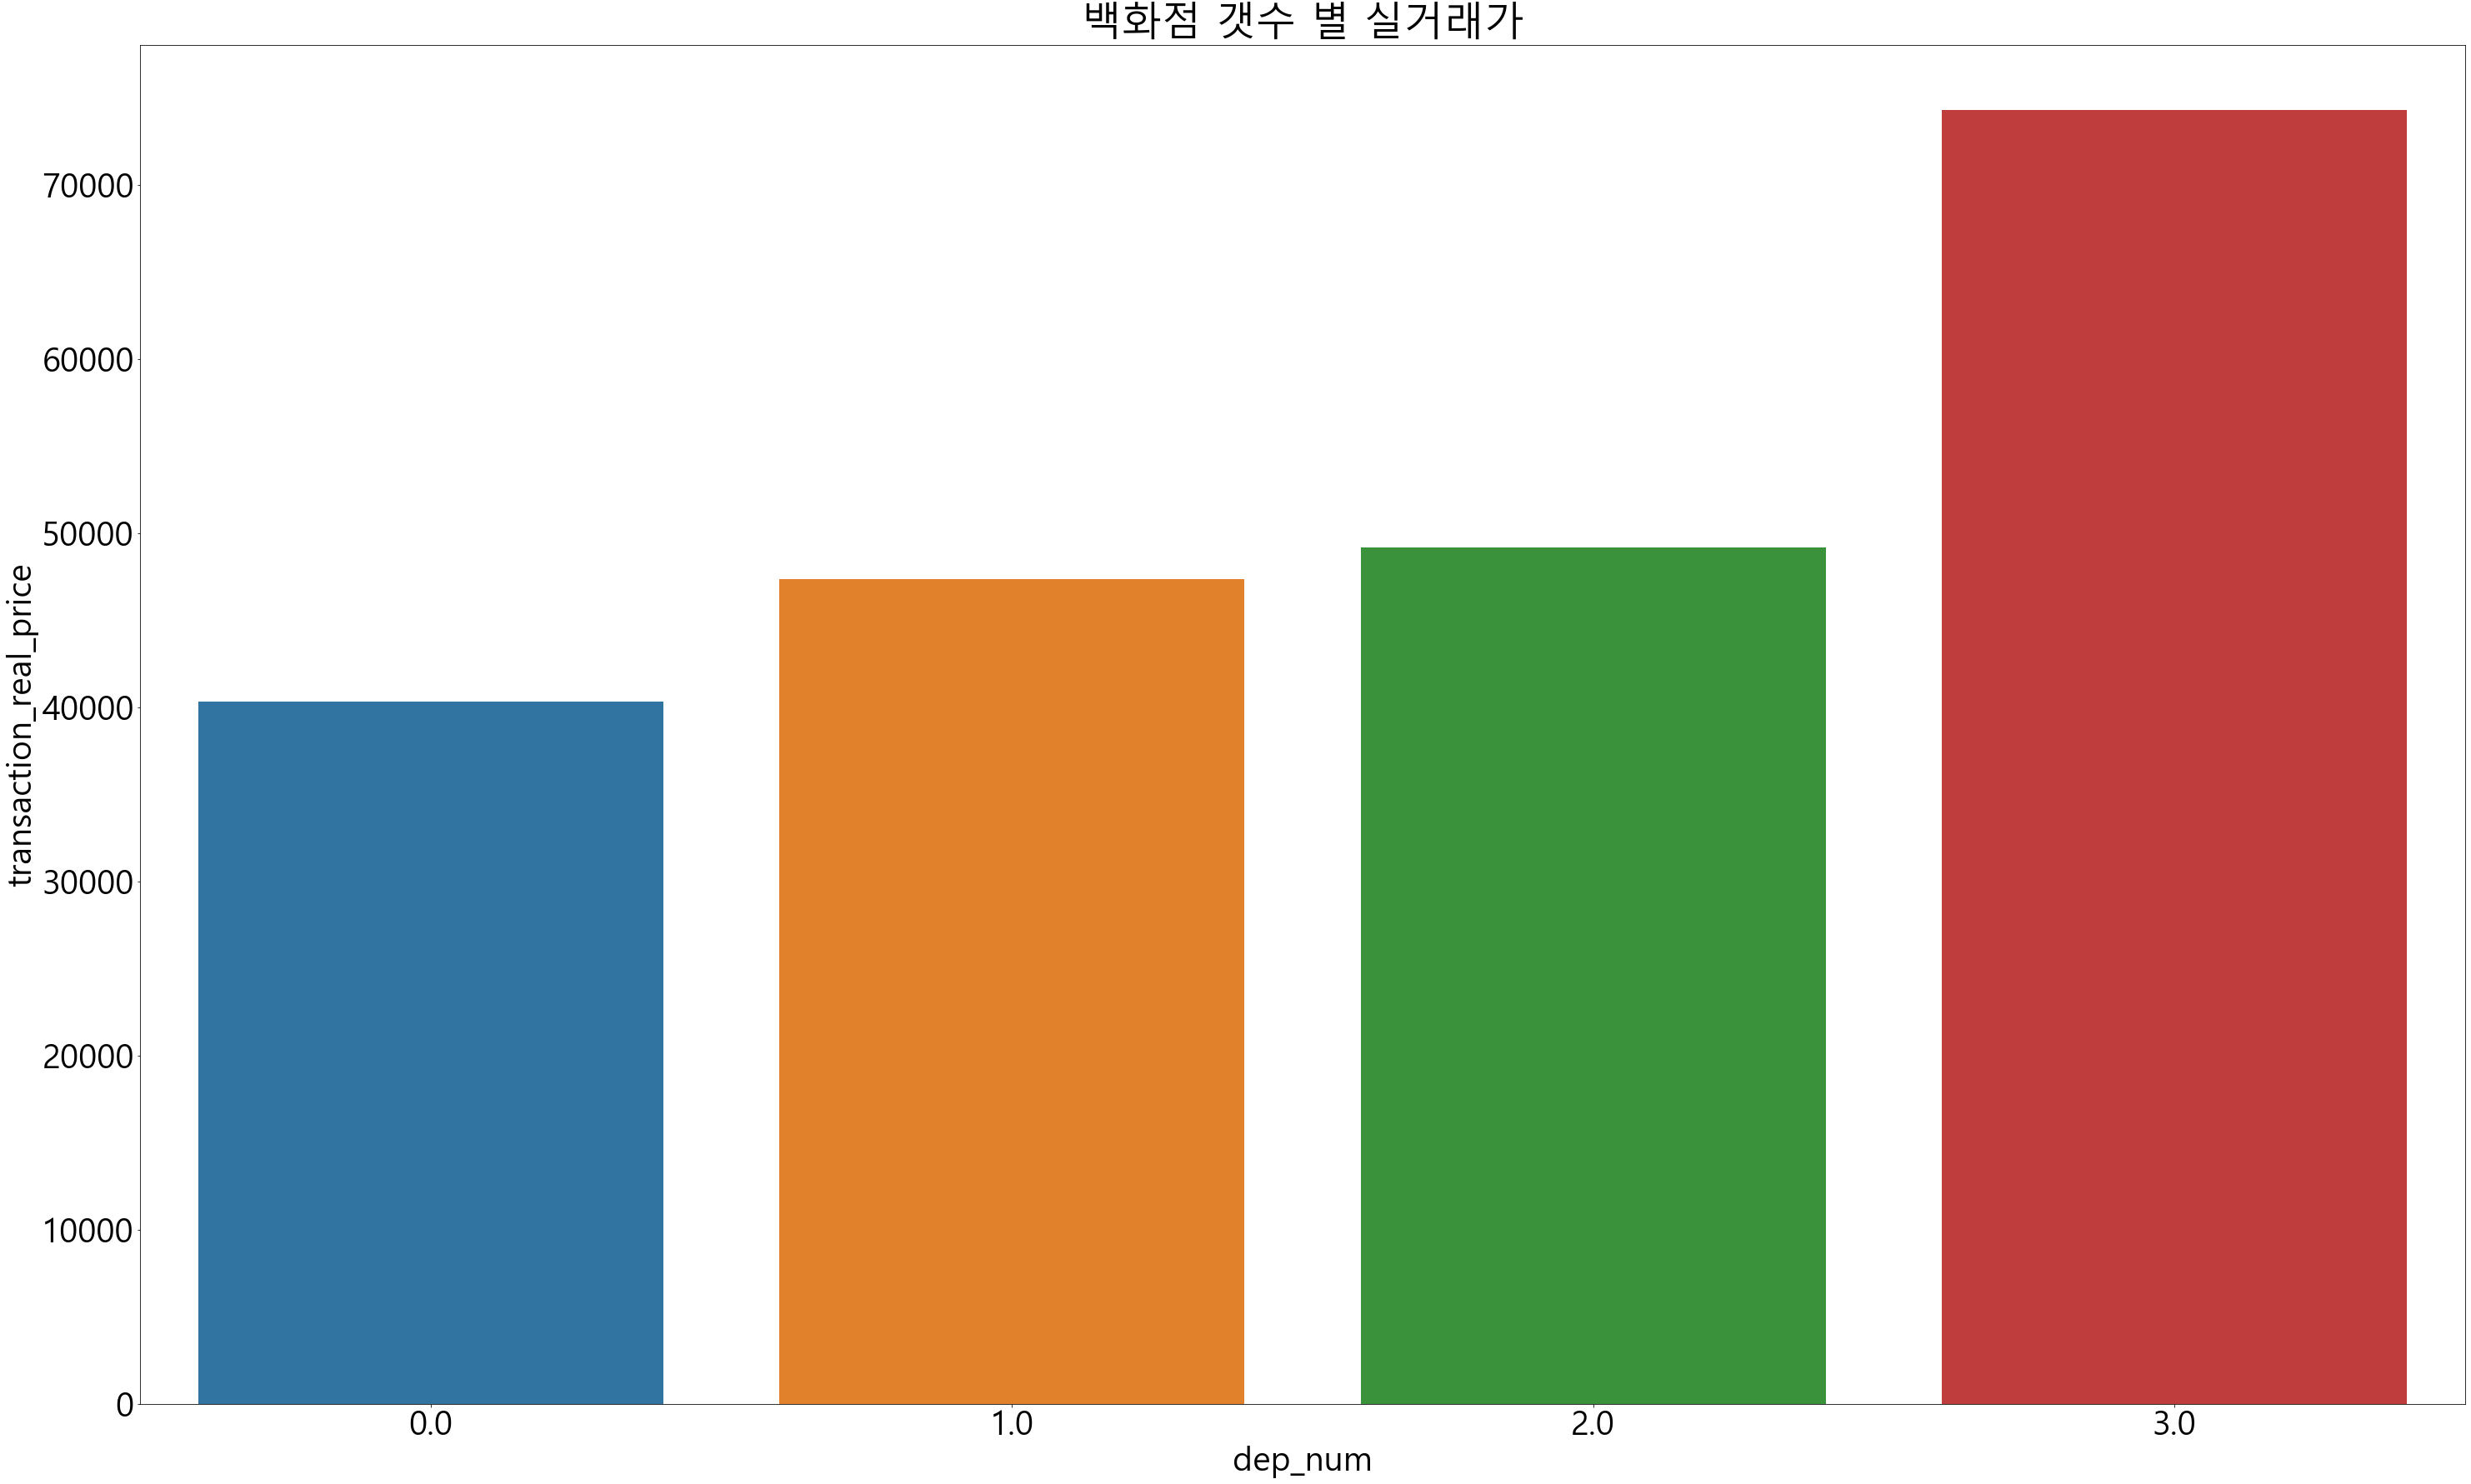

In [352]:
plt.figure(figsize = (50,30))
plt.rcParams.update({'font.size': 40})
b = sns.barplot(data= dep_group,x= dep_group.index, y= 'transaction_real_price')
plt.title("백화점 갯수 별 실거래가")

### 전체 평균과 구별 평균 비교

In [35]:
gu_mean = train.pivot_table('transaction_real_price','gu')

In [80]:
gu_mean.sort_values(by = 'transaction_real_price' , inplace = True, ascending=False)

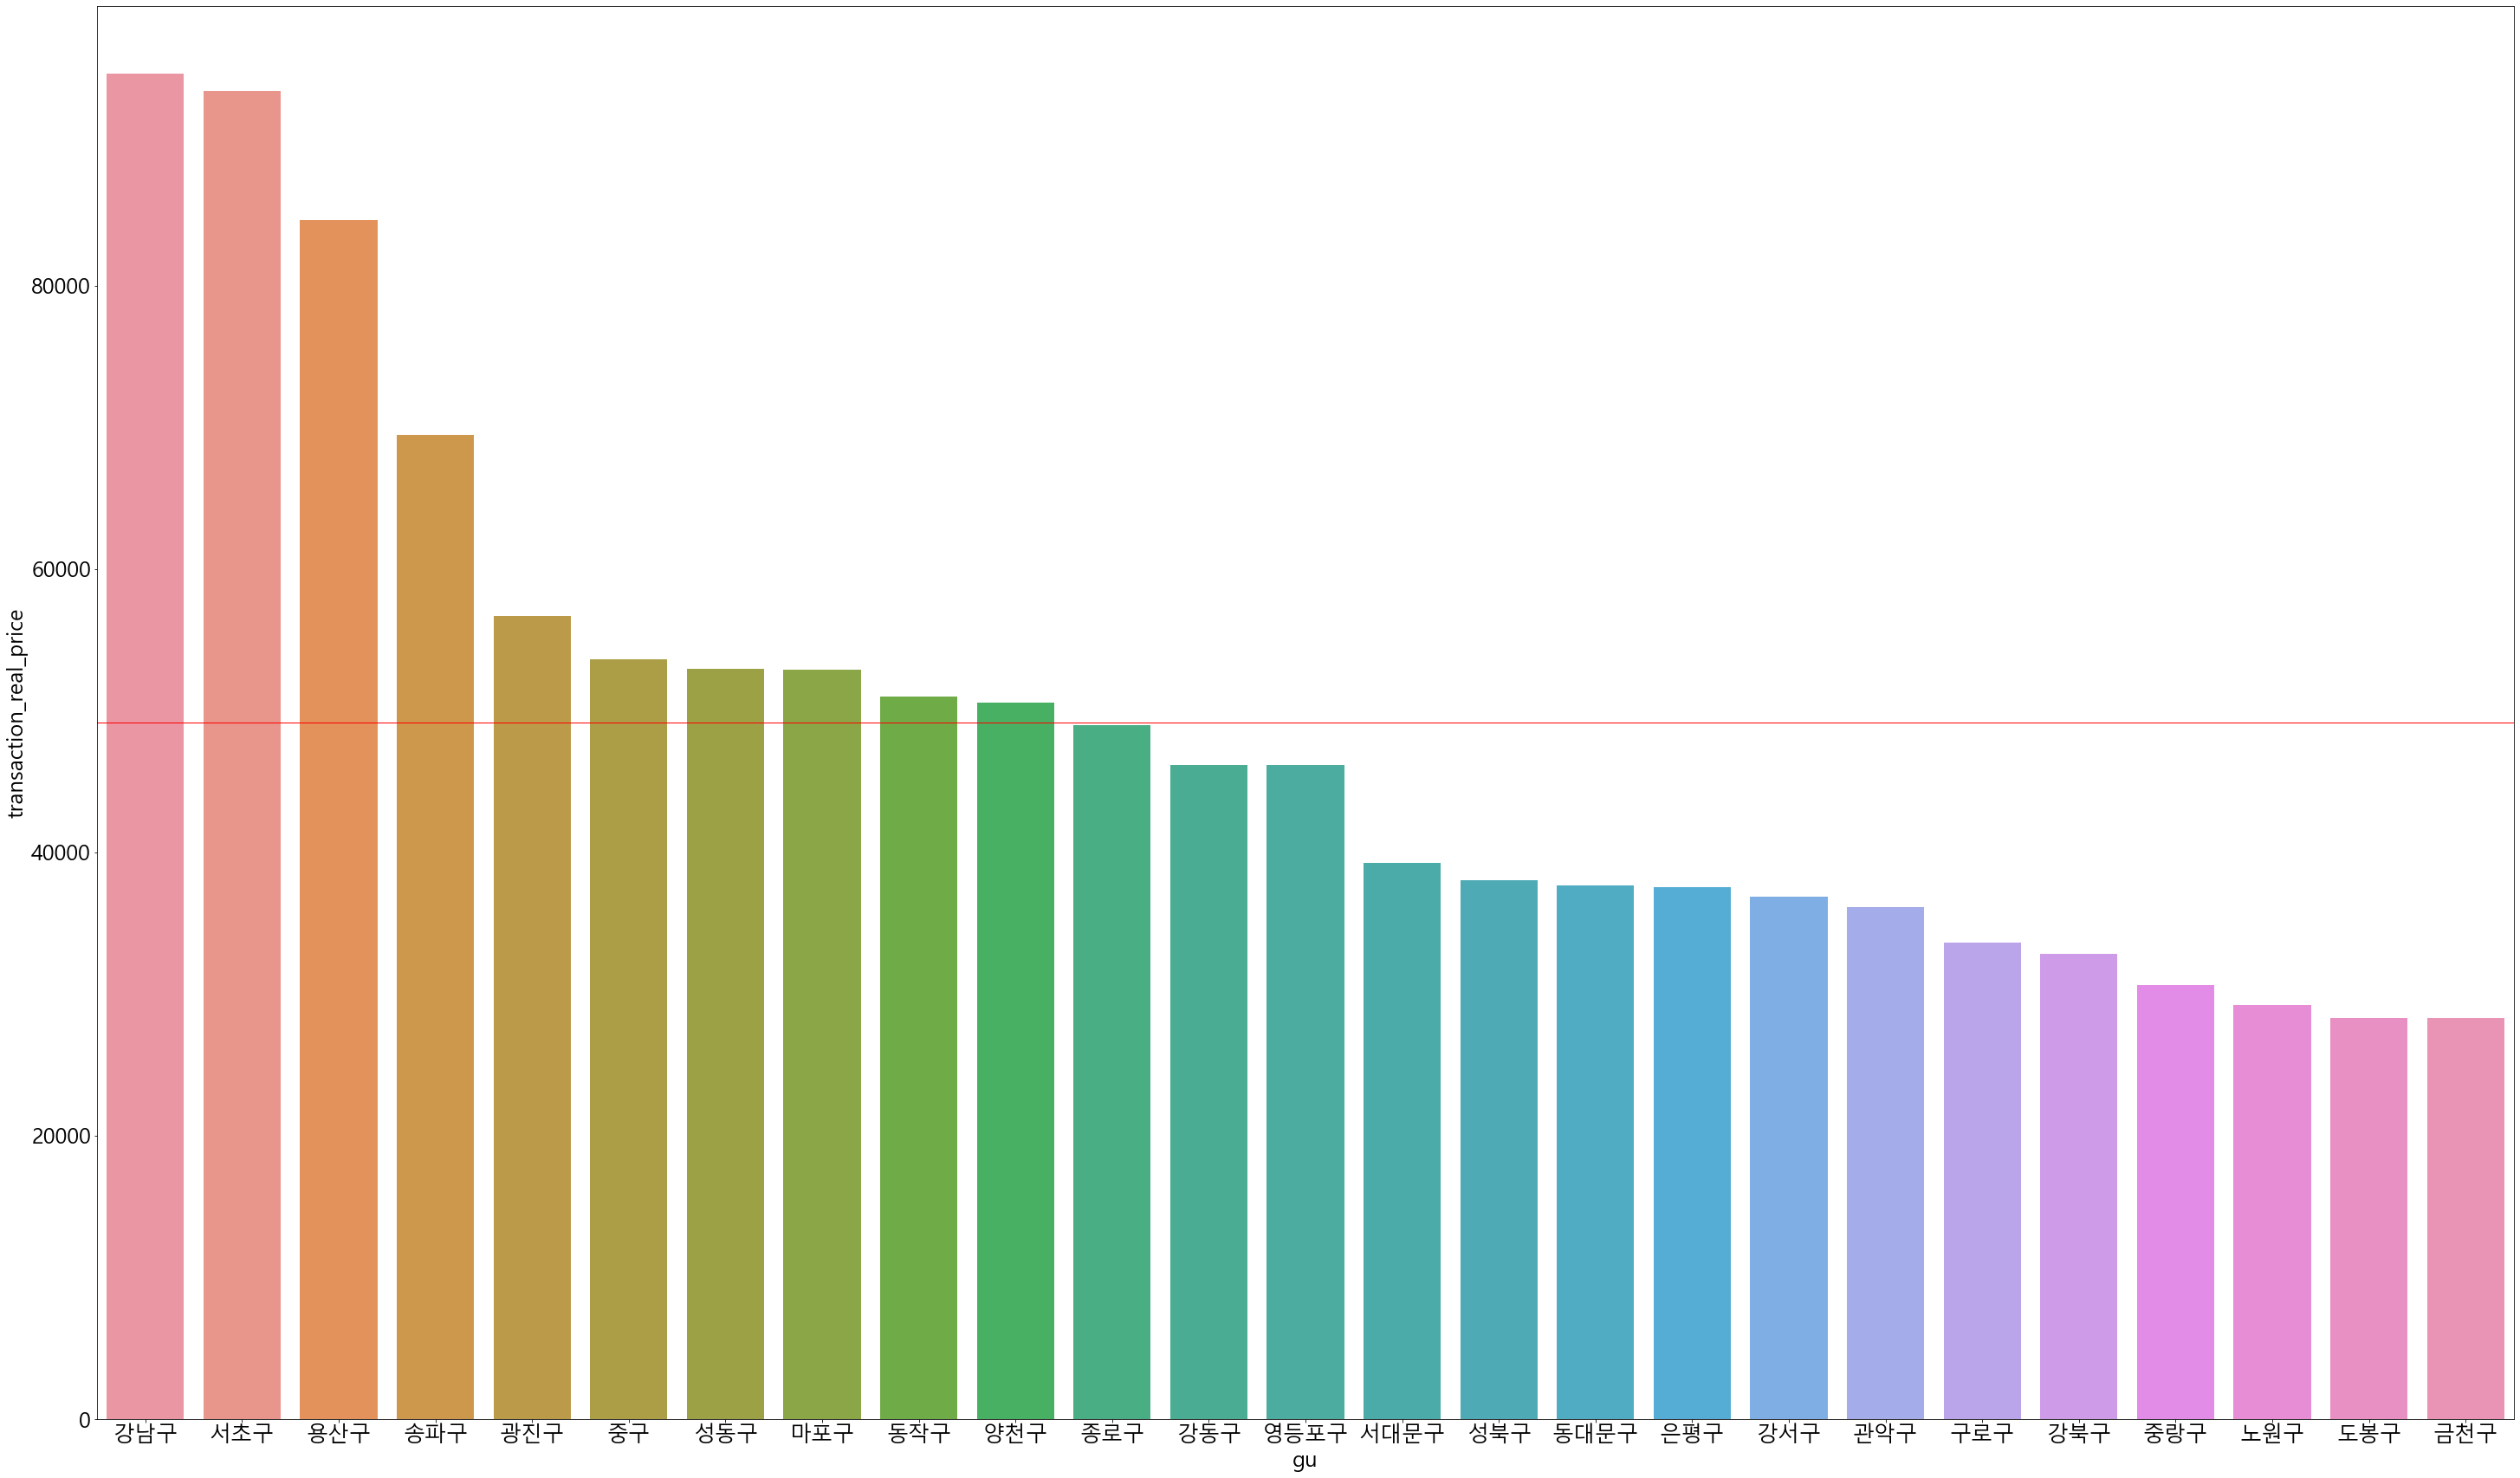

In [81]:
plt.figure(figsize = (50,30))
b = sns.barplot(data= gu_mean,x= gu_mean.index, y = 'transaction_real_price')
plt.rcParams.update({'font.size': 25})
plt.axhline(y = train['transaction_real_price'].mean(),color='r', linewidth=1)